In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [3]:
import numpy as np
np.shape(x_train)

(60000, 28, 28)

In [4]:
np.shape(y_train)

(60000,)

In [6]:
np.shape(x_test)

(10000, 28, 28)

In [7]:
np.shape(y_test)

(10000,)

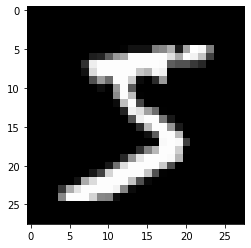

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')

In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(y_train[0])

5


In [12]:
import numpy as np
import copy
from tqdm import tqdm


class KMeans:

    def __init__(self, n_clusters=10, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.loss_per_iteration = []

    def init_centroids(self):
        np.random.seed(np.random.randint(0, 100000))
        self.centroids = []
        for i in range(self.n_clusters):
            rand_index = np.random.choice(range(len(self.fit_data)))
            self.centroids.append(self.fit_data[rand_index])

    def init_clusters(self):
        self.clusters = {'data': {i: [] for i in range(self.n_clusters)}}
        self.clusters['labels'] = {i: [] for i in range(self.n_clusters)}

    def fit(self, fit_data, fit_labels):
        self.fit_data = fit_data
        self.fit_labels = fit_labels
        self.predicted_labels = [None for _ in range(self.fit_data.shape[0])]
        self.init_centroids()
        self.iterations = 0
        old_centroids = [np.zeros(shape=(fit_data.shape[1],))
                         for _ in range(self.n_clusters)]
        while not self.converged(self.iterations, old_centroids, self.centroids):
            old_centroids = copy.deepcopy(self.centroids)
            self.init_clusters()
            for j, sample in tqdm(enumerate(self.fit_data)):
                min_dist = float('inf')
                for i, centroid in enumerate(self.centroids):
                    dist = np.linalg.norm(sample-centroid)
                    if dist < min_dist:
                        min_dist = dist
                        self.predicted_labels[j] = i
                if self.predicted_labels[j] is not None:
                    self.clusters['data'][self.predicted_labels[j]].append(
                        sample)
                    self.clusters['labels'][self.predicted_labels[j]].append(
                        self.fit_labels[j])
            self.reshape_cluster()
            self.update_centroids()
            self.calculate_loss()
            print("\nIteration:", self.iterations, 'Loss:',
                  self.loss, 'Difference:', self.centroids_dist)
            self.iterations += 1
        self.calculate_accuracy()

    def update_centroids(self):
        for i in range(self.n_clusters):
            cluster = self.clusters['data'][i]
            if cluster == []:
                self.centroids[i] = self.fit_data[np.random.choice(
                    range(len(self.fit_data)))]
            else:
                self.centroids[i] = np.mean(
                    np.vstack((self.centroids[i], cluster)), axis=0)

    def reshape_cluster(self):
        for id, mat in list(self.clusters['data'].items()):
            self.clusters['data'][id] = np.array(mat)

    def converged(self, iterations, centroids, updated_centroids):
        if iterations > self.max_iter:
            return True
        self.centroids_dist = np.linalg.norm(
            np.array(updated_centroids)-np.array(centroids))
        if self.centroids_dist <= 1e-10:
            print("Converged! With distance:", self.centroids_dist)
            return True
        return False

    def calculate_loss(self):
        self.loss = 0
        for key, value in list(self.clusters['data'].items()):
            if value is not None:
                for v in value:
                    self.loss += np.linalg.norm(v-self.centroids[key])
        self.loss_per_iteration.append(self.loss)

    def calculate_accuracy(self):
        self.clusters_labels = []
        self.clusters_info = []
        self.clusters_accuracy = []
        for clust, labels in list(self.clusters['labels'].items()):
            if isinstance(labels[0], (np.ndarray)):
                labels = [l[0] for l in labels]
            occur = 0
            max_label = max(set(labels), key=labels.count)
            self.clusters_labels.append(max_label)
            for label in labels:
                if label == max_label:
                    occur += 1
            acc = occur/len(list(labels))
            self.clusters_info.append(
                [max_label, occur, len(list(labels)), acc])
            self.clusters_accuracy.append(acc)
            self.accuracy = sum(self.clusters_accuracy)/self.n_clusters
        self.labels_ = []
        for i in range(len(self.predicted_labels)):
            self.labels_.append(self.clusters_labels[self.predicted_labels[i]])
        print('[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy]', self.clusters_info)
        print('Accuracy:', self.accuracy)
        
        
    def get_accuracy(self):
        self.clusters_labels = []
        self.clusters_info = []
        self.clusters_accuracy = []
        for clust, labels in list(self.clusters['labels'].items()):
            if isinstance(labels[0], (np.ndarray)):
                labels = [l[0] for l in labels]
            occur = 0
            max_label = max(set(labels), key=labels.count)
            self.clusters_labels.append(max_label)
            for label in labels:
                if label == max_label:
                    occur += 1
            acc = occur/len(list(labels))
            self.clusters_info.append(
                [max_label, occur, len(list(labels)), acc])
            self.clusters_accuracy.append(acc)
            self.accuracy = sum(self.clusters_accuracy)/self.n_clusters
        self.labels_ = []
        for i in range(len(self.predicted_labels)):
            self.labels_.append(self.clusters_labels[self.predicted_labels[i]])
        return self.accuracy

In [16]:
x_train = np.reshape(x_train,(60000,784))


In [17]:
kmeans = KMeans(n_clusters=10,max_iter=200)
kmeans.fit(x_train,y_train)

60000it [00:06, 9875.97it/s] 
<ipython-input-12-cd99e82a65b5>:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if cluster == []:
1142it [00:00, 10880.61it/s]


Iteration: 0 Loss: 103235421.5673124 Difference: 7498.93125718592


60000it [00:06, 9822.05it/s] 
1082it [00:00, 10736.76it/s]


Iteration: 1 Loss: 97006452.02628669 Difference: 4741.241007059264


60000it [00:05, 10244.49it/s]
1042it [00:00, 10292.84it/s]


Iteration: 2 Loss: 95679792.8380051 Difference: 1031.8745940957635


60000it [00:07, 8429.45it/s] 
601it [00:00, 5966.58it/s]


Iteration: 3 Loss: 95130762.81346233 Difference: 564.0693631044254


60000it [00:07, 8285.92it/s]
844it [00:00, 8378.78it/s]


Iteration: 4 Loss: 94861230.01674536 Difference: 360.0427467835428


60000it [00:07, 7741.62it/s]
640it [00:00, 6369.35it/s]


Iteration: 5 Loss: 94698945.77237521 Difference: 246.00265096520943


60000it [00:07, 8372.05it/s]
683it [00:00, 6780.59it/s]


Iteration: 6 Loss: 94598577.04588732 Difference: 186.61989464953282


60000it [00:07, 7807.89it/s] 
1085it [00:00, 10766.07it/s]


Iteration: 7 Loss: 94536969.28221314 Difference: 145.36921634650383


60000it [00:06, 9780.55it/s] 
1042it [00:00, 10289.86it/s]


Iteration: 8 Loss: 94500748.10260616 Difference: 117.88426443359774


60000it [00:05, 10244.75it/s]
941it [00:00, 9200.99it/s]


Iteration: 9 Loss: 94479367.28104022 Difference: 94.84477286077575


60000it [00:05, 10495.14it/s]
998it [00:00, 9907.49it/s]


Iteration: 10 Loss: 94463756.96381049 Difference: 79.42772420362627


60000it [00:05, 10166.89it/s]
1090it [00:00, 10821.24it/s]


Iteration: 11 Loss: 94451447.85945465 Difference: 77.156702860232


60000it [00:05, 10423.96it/s]
930it [00:00, 9232.45it/s]


Iteration: 12 Loss: 94439819.57168621 Difference: 72.13792719283416


60000it [00:05, 10572.95it/s]
1079it [00:00, 10707.07it/s]


Iteration: 13 Loss: 94425882.69444606 Difference: 76.33221508210755


60000it [00:05, 10480.43it/s]
2103it [00:00, 10151.70it/s]


Iteration: 14 Loss: 94407036.43973795 Difference: 82.4118587176003


60000it [00:05, 10503.75it/s]
1081it [00:00, 10727.22it/s]


Iteration: 15 Loss: 94379304.46533729 Difference: 88.84978806969816


60000it [00:05, 10530.97it/s]
974it [00:00, 9669.28it/s]


Iteration: 16 Loss: 94342313.8497748 Difference: 104.66317553256025


60000it [00:05, 10226.99it/s]
1082it [00:00, 10737.12it/s]


Iteration: 17 Loss: 94305932.66777687 Difference: 112.41676850147424


60000it [00:05, 10343.90it/s]
931it [00:00, 9284.22it/s]


Iteration: 18 Loss: 94276265.76310444 Difference: 98.80136033669343


60000it [00:05, 10118.95it/s]
2181it [00:00, 10653.66it/s]


Iteration: 19 Loss: 94250729.43465243 Difference: 84.31945067150872


60000it [00:05, 10063.65it/s]
1078it [00:00, 10307.04it/s]


Iteration: 20 Loss: 94229791.02026659 Difference: 77.16729710035185


60000it [00:06, 9883.51it/s] 
1101it [00:00, 10926.13it/s]


Iteration: 21 Loss: 94214616.50889067 Difference: 67.15534637595003


60000it [00:05, 10622.16it/s]
970it [00:00, 9634.86it/s]


Iteration: 22 Loss: 94205571.00429986 Difference: 58.884703306726536


60000it [00:05, 10483.32it/s]
2128it [00:00, 10702.32it/s]


Iteration: 23 Loss: 94198462.26558554 Difference: 47.213136803363966


60000it [00:05, 10289.46it/s]
1056it [00:00, 10069.24it/s]


Iteration: 24 Loss: 94192579.54772529 Difference: 41.82694364734626


60000it [00:05, 10678.81it/s]
2077it [00:00, 10357.83it/s]


Iteration: 25 Loss: 94189709.65999024 Difference: 34.7130111061345


60000it [00:06, 9923.47it/s] 
1674it [00:00, 8625.07it/s]


Iteration: 26 Loss: 94187914.0546327 Difference: 29.181271018056325


60000it [00:06, 9905.26it/s] 
1047it [00:00, 10144.53it/s]


Iteration: 27 Loss: 94186614.66505761 Difference: 24.80226410004533


60000it [00:06, 9118.55it/s] 
565it [00:00, 5609.06it/s]


Iteration: 28 Loss: 94185977.2140792 Difference: 22.102758318923858


60000it [00:08, 7207.23it/s]
745it [00:00, 7396.01it/s]


Iteration: 29 Loss: 94185963.03929996 Difference: 16.82438692477475


60000it [00:08, 7114.38it/s]
636it [00:00, 6302.44it/s]


Iteration: 30 Loss: 94185791.98057719 Difference: 15.660139671290672


60000it [00:08, 7291.22it/s] 
756it [00:00, 7318.26it/s]


Iteration: 31 Loss: 94185122.36750847 Difference: 16.000233045029432


60000it [00:09, 6166.76it/s]
469it [00:00, 4610.32it/s]


Iteration: 32 Loss: 94184908.04354398 Difference: 13.932319903581314


60000it [00:07, 8362.63it/s] 
932it [00:00, 9297.58it/s]


Iteration: 33 Loss: 94184644.58271192 Difference: 12.181005080430134


60000it [00:07, 8264.88it/s] 
1103it [00:00, 10950.12it/s]


Iteration: 34 Loss: 94184511.31732196 Difference: 10.372682258725424


60000it [00:06, 9405.21it/s] 
508it [00:00, 5043.22it/s]


Iteration: 35 Loss: 94184546.04951008 Difference: 10.100614500401853


60000it [00:06, 8663.13it/s] 
856it [00:00, 8497.87it/s]


Iteration: 36 Loss: 94184562.01837543 Difference: 10.14589039967904


60000it [00:06, 9359.37it/s] 
856it [00:00, 8497.81it/s]


Iteration: 37 Loss: 94184718.73511699 Difference: 8.663910279793686


60000it [00:05, 10260.08it/s]
1071it [00:00, 10632.39it/s]


Iteration: 38 Loss: 94184660.50435506 Difference: 7.137764644466949


60000it [00:06, 9492.40it/s] 
1663it [00:00, 8356.30it/s]


Iteration: 39 Loss: 94184760.54489292 Difference: 6.3793356828834815


60000it [00:06, 9316.03it/s] 
998it [00:00, 9908.20it/s]


Iteration: 40 Loss: 94184772.18406777 Difference: 6.684042534682387


60000it [00:06, 9574.97it/s] 
772it [00:00, 7664.06it/s]


Iteration: 41 Loss: 94184779.42669487 Difference: 6.830146242012251


60000it [00:06, 8770.98it/s] 
1531it [00:00, 7491.30it/s]


Iteration: 42 Loss: 94184848.736988 Difference: 4.534152040593116


60000it [00:07, 7603.42it/s] 
682it [00:00, 6804.06it/s]


Iteration: 43 Loss: 94185028.80874167 Difference: 3.9872340650329727


60000it [00:08, 6714.75it/s]
623it [00:00, 6127.39it/s]


Iteration: 44 Loss: 94185100.62829906 Difference: 3.9818674936839336


60000it [00:08, 6819.19it/s]
452it [00:00, 4505.78it/s]


Iteration: 45 Loss: 94184961.62866844 Difference: 5.234951059684923


60000it [00:08, 6676.43it/s]
671it [00:00, 6661.44it/s]


Iteration: 46 Loss: 94184888.66392483 Difference: 5.067710787323509


60000it [00:09, 6321.16it/s]
1759it [00:00, 8622.70it/s]


Iteration: 47 Loss: 94184954.62080988 Difference: 4.681458478189983


60000it [00:06, 8941.31it/s] 
763it [00:00, 7571.63it/s]


Iteration: 48 Loss: 94185076.86068532 Difference: 4.248195716058982


60000it [00:07, 8446.70it/s] 
1748it [00:00, 8691.07it/s]


Iteration: 49 Loss: 94185397.58891779 Difference: 3.806311454562365


60000it [00:06, 8987.47it/s] 
2043it [00:00, 9904.93it/s]


Iteration: 50 Loss: 94185453.955211 Difference: 3.7526987708143142


60000it [00:07, 8212.83it/s] 
785it [00:00, 7790.11it/s]


Iteration: 51 Loss: 94185438.89537889 Difference: 3.46346650949567


60000it [00:06, 8660.57it/s] 
617it [00:00, 6125.25it/s]


Iteration: 52 Loss: 94185649.66590102 Difference: 3.68492706777668


60000it [00:09, 6534.31it/s]
984it [00:00, 9768.19it/s]


Iteration: 53 Loss: 94185769.75490262 Difference: 3.974078602979725


60000it [00:07, 7855.24it/s]
840it [00:00, 8339.19it/s]


Iteration: 54 Loss: 94186028.76523888 Difference: 4.052824308618043


60000it [00:07, 7604.23it/s]
672it [00:00, 6671.24it/s]


Iteration: 55 Loss: 94186215.07956503 Difference: 3.643505780808956


60000it [00:08, 6845.17it/s]
656it [00:00, 6512.42it/s]


Iteration: 56 Loss: 94186471.13601401 Difference: 3.5250504651626704


60000it [00:10, 5491.55it/s]
415it [00:00, 4118.99it/s]


Iteration: 57 Loss: 94186392.88497888 Difference: 4.477884684000834


60000it [00:09, 6172.24it/s]
707it [00:00, 7018.73it/s]


Iteration: 58 Loss: 94186403.17105502 Difference: 3.2137556679735293


60000it [00:10, 5455.69it/s]
749it [00:00, 7427.50it/s]


Iteration: 59 Loss: 94186403.30154766 Difference: 2.7565041264699124


60000it [00:09, 6270.68it/s]
774it [00:00, 7683.98it/s]


Iteration: 60 Loss: 94186554.7561712 Difference: 1.8940263355864873


60000it [00:06, 8696.61it/s] 
1580it [00:00, 7810.25it/s]


Iteration: 61 Loss: 94186798.4082745 Difference: 2.9422195032683196


60000it [00:07, 7969.71it/s] 
1158it [00:00, 11333.71it/s]


Iteration: 62 Loss: 94186932.58798498 Difference: 3.7458903523582325


60000it [00:06, 8787.92it/s] 
1050it [00:00, 10419.18it/s]


Iteration: 63 Loss: 94187001.17796801 Difference: 3.415367408363164


60000it [00:06, 8646.57it/s] 
1081it [00:00, 10731.59it/s]


Iteration: 64 Loss: 94187062.41220932 Difference: 5.065550318760637


60000it [00:06, 9441.93it/s] 
2285it [00:00, 11292.01it/s]


Iteration: 65 Loss: 94187206.5769445 Difference: 5.092938240172766


60000it [00:05, 10558.10it/s]
2238it [00:00, 10950.70it/s]


Iteration: 66 Loss: 94187042.63879691 Difference: 4.111538084535039


60000it [00:05, 10088.91it/s]
956it [00:00, 9490.59it/s]


Iteration: 67 Loss: 94186977.87110408 Difference: 3.9432973784803753


60000it [00:06, 8767.42it/s] 
988it [00:00, 9808.50it/s]


Iteration: 68 Loss: 94187127.20373958 Difference: 3.32748524929044


60000it [00:06, 8991.69it/s] 
1974it [00:00, 9715.35it/s]


Iteration: 69 Loss: 94187163.98664671 Difference: 2.3781926895871104


60000it [00:06, 9129.84it/s] 
1064it [00:00, 10558.62it/s]


Iteration: 70 Loss: 94187078.59434962 Difference: 2.9290433264968327


60000it [00:07, 8429.44it/s] 
990it [00:00, 9833.64it/s]


Iteration: 71 Loss: 94187114.49142031 Difference: 2.5789119396193945


60000it [00:06, 8908.07it/s] 
859it [00:00, 8584.11it/s]


Iteration: 72 Loss: 94187175.09468459 Difference: 1.3432604165774318


60000it [00:06, 9153.30it/s] 
2280it [00:00, 11225.12it/s]


Iteration: 73 Loss: 94187166.79941836 Difference: 1.022143251157366


60000it [00:06, 9922.14it/s] 
854it [00:00, 8474.72it/s]


Iteration: 74 Loss: 94187166.79814774 Difference: 0.27880814630165934


60000it [00:06, 8743.00it/s] 
907it [00:00, 9000.06it/s]


Iteration: 75 Loss: 94187166.79814741 Difference: 4.0246354055461273e-05


60000it [00:06, 9669.68it/s] 



Iteration: 76 Loss: 94187166.79814743 Difference: 5.827156978058849e-09
Converged! With distance: 8.927717784794691e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[7, 2824, 6690, 0.42212257100149475], [0, 4676, 4975, 0.9398994974874372], [4, 2188, 5416, 0.40398818316100443], [1, 2977, 5298, 0.561910154775387], [8, 3104, 7065, 0.43934890304317054], [6, 4591, 5394, 0.8511308861698184], [9, 2473, 7238, 0.3416689693285438], [2, 4192, 4635, 0.9044228694714131], [1, 3713, 5497, 0.6754593414589776], [3, 3888, 7792, 0.4989733059548255]]
Accuracy: 0.6038924681852073


In [24]:
kmeans = KMeans(n_clusters=20,max_iter=200)
kmeans.fit(x_train,y_train)

60000it [00:12, 4868.78it/s]
<ipython-input-12-cd99e82a65b5>:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if cluster == []:
484it [00:00, 4728.62it/s]


Iteration: 0 Loss: 100370517.07599725 Difference: 10228.398750537643


60000it [00:15, 3993.90it/s]
525it [00:00, 5211.96it/s]


Iteration: 1 Loss: 91953240.6291605 Difference: 5911.453239069944


60000it [00:15, 3954.48it/s]
447it [00:00, 4437.61it/s]


Iteration: 2 Loss: 90847663.67565504 Difference: 1352.2525250718122


60000it [00:13, 4446.51it/s]
557it [00:00, 5529.62it/s]


Iteration: 3 Loss: 90286731.8812334 Difference: 667.5970581961406


60000it [00:11, 5282.83it/s]
555it [00:00, 5446.12it/s]


Iteration: 4 Loss: 89894889.8879463 Difference: 504.68762696198


60000it [00:11, 5380.55it/s]
513it [00:00, 5032.00it/s]


Iteration: 5 Loss: 89665687.21983156 Difference: 427.164864190895


60000it [00:11, 5429.79it/s]
578it [00:00, 5649.82it/s]


Iteration: 6 Loss: 89548050.28518283 Difference: 316.1979463890527


60000it [00:11, 5193.67it/s]
581it [00:00, 5802.30it/s]


Iteration: 7 Loss: 89478628.93940888 Difference: 225.53105830327263


60000it [00:10, 5459.42it/s]
584it [00:00, 5795.21it/s]


Iteration: 8 Loss: 89434128.44655377 Difference: 176.98924013069285


60000it [00:10, 5481.51it/s]
546it [00:00, 5420.29it/s]


Iteration: 9 Loss: 89400823.95320664 Difference: 144.06561042888887


60000it [00:13, 4602.46it/s]
224it [00:00, 2205.07it/s]


Iteration: 10 Loss: 89376092.6599766 Difference: 130.47932151089228


60000it [00:17, 3416.64it/s]
361it [00:00, 3467.62it/s]


Iteration: 11 Loss: 89356983.44288577 Difference: 119.91198587918048


60000it [00:16, 3571.56it/s]
481it [00:00, 4610.46it/s]


Iteration: 12 Loss: 89344604.29158479 Difference: 104.91804718027096


60000it [00:12, 4805.58it/s]
400it [00:00, 3939.57it/s]


Iteration: 13 Loss: 89335693.92343044 Difference: 86.8869401806103


60000it [00:12, 4909.23it/s]
402it [00:00, 3995.46it/s]


Iteration: 14 Loss: 89326825.91721234 Difference: 76.36769469438437


60000it [00:12, 4693.53it/s]
1036it [00:00, 4919.95it/s]


Iteration: 15 Loss: 89317952.04955995 Difference: 75.24483032397329


60000it [00:11, 5245.43it/s]
527it [00:00, 5264.11it/s]


Iteration: 16 Loss: 89309187.01185296 Difference: 73.18468296805317


60000it [00:11, 5266.48it/s]
559it [00:00, 5423.05it/s]


Iteration: 17 Loss: 89301414.34825577 Difference: 73.10903482238086


60000it [00:12, 4782.66it/s]
335it [00:00, 3229.75it/s]


Iteration: 18 Loss: 89292135.93231729 Difference: 72.94500430264974


60000it [00:18, 3303.68it/s]
320it [00:00, 3176.81it/s]


Iteration: 19 Loss: 89281935.98674682 Difference: 78.24498940893508


60000it [00:17, 3427.09it/s]
300it [00:00, 2978.22it/s]


Iteration: 20 Loss: 89268964.20772374 Difference: 80.32522413804685


60000it [00:14, 4257.63it/s]
582it [00:00, 5658.40it/s]


Iteration: 21 Loss: 89258068.47720227 Difference: 89.37612153314818


60000it [00:12, 4840.04it/s]
501it [00:00, 4973.67it/s]


Iteration: 22 Loss: 89248459.40657106 Difference: 78.19928755827871


60000it [00:12, 4936.14it/s]
427it [00:00, 4159.43it/s]


Iteration: 23 Loss: 89242444.90088847 Difference: 72.88586206136573


60000it [00:12, 4809.01it/s]
542it [00:00, 5164.38it/s]


Iteration: 24 Loss: 89238328.04454152 Difference: 60.99257227507681


60000it [00:11, 5202.82it/s]
537it [00:00, 5300.62it/s]


Iteration: 25 Loss: 89235142.71919332 Difference: 50.543004215746734


60000it [00:12, 4776.73it/s]
409it [00:00, 4060.32it/s]


Iteration: 26 Loss: 89232482.9857458 Difference: 45.741674179751115


60000it [00:16, 3686.70it/s]
385it [00:00, 3822.08it/s]


Iteration: 27 Loss: 89230567.28670159 Difference: 39.541842958487955


60000it [00:14, 4054.50it/s]
470it [00:00, 4665.95it/s]


Iteration: 28 Loss: 89229083.25434387 Difference: 34.73132177782781


60000it [00:12, 4731.72it/s]
572it [00:00, 5681.70it/s]


Iteration: 29 Loss: 89227660.87757592 Difference: 32.44528470252967


60000it [00:15, 3988.20it/s]
375it [00:00, 3685.72it/s]


Iteration: 30 Loss: 89226037.75628944 Difference: 29.322562947486283


60000it [00:15, 3751.97it/s]
422it [00:00, 4213.61it/s]


Iteration: 31 Loss: 89224924.0806735 Difference: 28.159093489300826


60000it [00:17, 3409.89it/s]
406it [00:00, 4035.97it/s]


Iteration: 32 Loss: 89223850.89462882 Difference: 25.39572965094565


60000it [00:12, 4766.65it/s]
1082it [00:00, 5470.17it/s]


Iteration: 33 Loss: 89223206.7567723 Difference: 24.28310965937955


60000it [00:13, 4575.34it/s]
458it [00:00, 4506.58it/s]


Iteration: 34 Loss: 89222317.23540372 Difference: 21.782857062493342


60000it [00:14, 4203.04it/s]
334it [00:00, 3188.29it/s]


Iteration: 35 Loss: 89221377.44670074 Difference: 20.285673825238792


60000it [00:13, 4592.01it/s]
571it [00:00, 5447.98it/s]


Iteration: 36 Loss: 89220812.48817158 Difference: 19.345797867829834


60000it [00:14, 4024.03it/s]
540it [00:00, 5380.47it/s]


Iteration: 37 Loss: 89220517.17018792 Difference: 17.946429389598975


60000it [00:15, 3894.39it/s]
279it [00:00, 2749.52it/s]


Iteration: 38 Loss: 89219768.38114198 Difference: 18.2467612009206


60000it [00:21, 2854.12it/s]
220it [00:00, 2184.07it/s]


Iteration: 39 Loss: 89218998.46193917 Difference: 22.51398146239475


60000it [00:16, 3740.95it/s]
397it [00:00, 3941.22it/s]


Iteration: 40 Loss: 89218621.04243754 Difference: 22.449261298795182


60000it [00:14, 4234.50it/s]
528it [00:00, 5244.67it/s]


Iteration: 41 Loss: 89217773.94626063 Difference: 21.493094976017773


60000it [00:13, 4584.19it/s]
933it [00:00, 4590.91it/s]


Iteration: 42 Loss: 89217013.30300331 Difference: 22.398295575633774


60000it [00:12, 4962.32it/s]
1083it [00:00, 5297.17it/s]


Iteration: 43 Loss: 89216355.47159834 Difference: 22.60997259069111


60000it [00:12, 4962.76it/s]
512it [00:00, 5082.89it/s]


Iteration: 44 Loss: 89214926.31884061 Difference: 21.380912992842752


60000it [00:12, 4931.00it/s]
495it [00:00, 4914.03it/s]


Iteration: 45 Loss: 89213708.44302697 Difference: 21.992332100353497


60000it [00:18, 3301.21it/s]
314it [00:00, 3080.61it/s]


Iteration: 46 Loss: 89212169.67195463 Difference: 22.561591951924626


60000it [00:18, 3185.26it/s]
194it [00:00, 1925.86it/s]


Iteration: 47 Loss: 89209822.58523065 Difference: 24.957801845686834


60000it [00:16, 3711.62it/s]
427it [00:00, 4236.92it/s]


Iteration: 48 Loss: 89207168.06747453 Difference: 28.99901431134706


60000it [00:13, 4588.14it/s]
414it [00:00, 4109.89it/s]


Iteration: 49 Loss: 89203686.01272163 Difference: 33.40340336761282


60000it [00:13, 4474.83it/s]
548it [00:00, 5415.13it/s]


Iteration: 50 Loss: 89199715.60311107 Difference: 36.88521681351758


60000it [00:12, 4905.14it/s]
343it [00:00, 3339.02it/s]


Iteration: 51 Loss: 89195723.67839348 Difference: 39.14187467574267


60000it [00:12, 4901.08it/s]
590it [00:00, 5854.86it/s]


Iteration: 52 Loss: 89190828.36070196 Difference: 40.76826780189731


60000it [00:14, 4200.75it/s]
414it [00:00, 4119.50it/s]


Iteration: 53 Loss: 89184034.43715788 Difference: 43.52853356667771


60000it [00:13, 4556.63it/s]
872it [00:00, 4238.37it/s]


Iteration: 54 Loss: 89175132.21017116 Difference: 54.02817621108756


60000it [00:13, 4484.47it/s]
461it [00:00, 4578.11it/s]


Iteration: 55 Loss: 89164625.69412543 Difference: 59.759696999203484


60000it [00:12, 4660.41it/s]
436it [00:00, 4328.26it/s]


Iteration: 56 Loss: 89154153.67525999 Difference: 62.040030948057336


60000it [00:13, 4328.94it/s]
309it [00:00, 3067.58it/s]


Iteration: 57 Loss: 89144652.6868142 Difference: 62.07283118851337


60000it [00:25, 2326.67it/s]
380it [00:00, 3713.38it/s]


Iteration: 58 Loss: 89136807.16688204 Difference: 58.197255160609316


60000it [00:19, 3130.43it/s]
411it [00:00, 4071.26it/s]


Iteration: 59 Loss: 89130235.19962278 Difference: 56.54717815940649


60000it [00:16, 3743.66it/s]
409it [00:00, 4087.14it/s]


Iteration: 60 Loss: 89124327.31951046 Difference: 53.00266793716685


60000it [00:15, 3900.11it/s]
438it [00:00, 4348.17it/s]


Iteration: 61 Loss: 89118988.49611963 Difference: 47.41114459222482


60000it [00:14, 4243.01it/s]
275it [00:00, 2730.54it/s]


Iteration: 62 Loss: 89114436.09855998 Difference: 46.79347334575252


60000it [00:12, 4616.95it/s]
520it [00:00, 4982.71it/s]


Iteration: 63 Loss: 89110769.2638562 Difference: 45.440908271298454


60000it [00:15, 3825.81it/s]
347it [00:00, 3373.92it/s]


Iteration: 64 Loss: 89108000.87776832 Difference: 39.85939985078271


60000it [00:19, 3010.65it/s]
320it [00:00, 3176.86it/s]


Iteration: 65 Loss: 89106076.02226809 Difference: 32.41178398930262


60000it [00:17, 3478.46it/s]
454it [00:00, 4370.54it/s]


Iteration: 66 Loss: 89104298.37167627 Difference: 30.79046671203739


60000it [00:13, 4394.56it/s]
557it [00:00, 5531.59it/s]


Iteration: 67 Loss: 89103193.03202355 Difference: 24.77341846561383


60000it [00:12, 4775.25it/s]
430it [00:00, 4258.62it/s]


Iteration: 68 Loss: 89103005.93738073 Difference: 21.820273216173042


60000it [00:12, 4852.28it/s]
386it [00:00, 3804.03it/s]


Iteration: 69 Loss: 89102759.0375194 Difference: 18.69449708846887


60000it [00:12, 4804.37it/s]
521it [00:00, 5042.82it/s]


Iteration: 70 Loss: 89102288.46715428 Difference: 15.107147546835742


60000it [00:12, 4632.62it/s]
501it [00:00, 4962.38it/s]


Iteration: 71 Loss: 89101976.10842058 Difference: 14.725348756561852


60000it [00:13, 4433.41it/s]
524it [00:00, 5072.22it/s]


Iteration: 72 Loss: 89101598.6185799 Difference: 12.593056934740828


60000it [00:11, 5058.11it/s]
500it [00:00, 4799.89it/s]


Iteration: 73 Loss: 89101322.9705434 Difference: 12.615477379929953


60000it [00:12, 4970.15it/s]
551it [00:00, 5359.69it/s]


Iteration: 74 Loss: 89100930.74502178 Difference: 11.68532071256939


60000it [00:12, 4880.62it/s]
545it [00:00, 5281.53it/s]


Iteration: 75 Loss: 89100879.92181654 Difference: 10.09439782597396


60000it [00:13, 4370.05it/s]
710it [00:00, 3586.59it/s]


Iteration: 76 Loss: 89100793.85898602 Difference: 8.928015852692674


60000it [00:18, 3325.28it/s]
291it [00:00, 2809.88it/s]


Iteration: 77 Loss: 89101019.17427823 Difference: 8.66953501095325


60000it [00:17, 3469.78it/s]
347it [00:00, 3337.77it/s]


Iteration: 78 Loss: 89101067.94373451 Difference: 6.9731583484120945


60000it [00:13, 4454.21it/s]
549it [00:00, 5280.68it/s]


Iteration: 79 Loss: 89100916.87513202 Difference: 7.362724524562863


60000it [00:13, 4541.37it/s]
493it [00:00, 4771.67it/s]


Iteration: 80 Loss: 89100848.14164928 Difference: 6.615184380750722


60000it [00:12, 4958.46it/s]
486it [00:00, 4855.43it/s]


Iteration: 81 Loss: 89100781.42796355 Difference: 5.727403217600932


60000it [00:12, 4976.40it/s]
548it [00:00, 5295.77it/s]


Iteration: 82 Loss: 89100503.13091052 Difference: 4.909622113331387


60000it [00:11, 5031.93it/s]
418it [00:00, 4089.28it/s]


Iteration: 83 Loss: 89100286.0076128 Difference: 4.287065349962737


60000it [00:13, 4494.89it/s]
320it [00:00, 3197.84it/s]


Iteration: 84 Loss: 89100319.47838196 Difference: 3.5050526730820106


60000it [00:19, 3114.63it/s]
336it [00:00, 3218.00it/s]


Iteration: 85 Loss: 89100454.83851032 Difference: 3.800855857846852


60000it [00:17, 3383.75it/s]
259it [00:00, 2565.59it/s]


Iteration: 86 Loss: 89100629.63947532 Difference: 4.277348617539618


60000it [00:14, 4264.24it/s]
548it [00:00, 5254.11it/s]


Iteration: 87 Loss: 89100703.30920398 Difference: 4.105994730248728


60000it [00:13, 4442.68it/s]
560it [00:00, 5360.22it/s]


Iteration: 88 Loss: 89100779.58053538 Difference: 2.8715406769145657


60000it [00:12, 4663.04it/s]
430it [00:00, 4192.14it/s]


Iteration: 89 Loss: 89100750.94357349 Difference: 2.0301011547962218


60000it [00:14, 4250.76it/s]
356it [00:00, 3534.17it/s]


Iteration: 90 Loss: 89100742.13515551 Difference: 1.955983895618348


60000it [00:12, 4687.09it/s]
398it [00:00, 3949.94it/s]


Iteration: 91 Loss: 89100734.78373499 Difference: 1.2945388705144916


60000it [00:14, 4099.61it/s]
493it [00:00, 4895.68it/s]


Iteration: 92 Loss: 89100734.78126858 Difference: 0.8519351320737196


60000it [00:14, 4097.41it/s]
487it [00:00, 4834.70it/s]


Iteration: 93 Loss: 89100734.78126787 Difference: 0.00033439781652575966


60000it [00:12, 4684.56it/s]



Iteration: 94 Loss: 89100734.78126787 Difference: 1.313099921295067e-07
Converged! With distance: 5.157197591877987e-11
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[1, 2459, 3101, 0.7929700096742986], [0, 2509, 2624, 0.9561737804878049], [4, 1146, 2363, 0.48497672450275076], [6, 2259, 2585, 0.8738878143133463], [4, 1267, 2444, 0.5184124386252046], [9, 1249, 3451, 0.3619240799768183], [1, 2422, 2970, 0.8154882154882155], [4, 1300, 2599, 0.5001923816852636], [8, 3330, 4412, 0.7547597461468721], [3, 2145, 4938, 0.43438639125151884], [1, 1774, 2339, 0.758443779392903], [6, 2010, 2512, 0.8001592356687898], [6, 1324, 1568, 0.8443877551020408], [5, 1736, 2784, 0.6235632183908046], [7, 1923, 2017, 0.9533961328705999], [3, 2767, 4226, 0.6547562707051585], [0, 2388, 2637, 0.9055745164960182], [2, 4115, 4307, 0.9554214070118412], [7, 2227, 2475, 0.8997979797979798], [9, 1520, 3648, 0.4166666666666667]]
Accuracy: 0.7152669272127448


In [25]:
kmeans = KMeans(n_clusters=5,max_iter=200)
kmeans.fit(x_train,y_train)

60000it [00:03, 17346.33it/s]
<ipython-input-12-cd99e82a65b5>:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if cluster == []:
542it [00:00, 5380.65it/s]


Iteration: 0 Loss: 105234819.1169389 Difference: 5161.4901917953885


60000it [00:06, 9447.64it/s] 
1893it [00:00, 18804.75it/s]


Iteration: 1 Loss: 102368947.3314472 Difference: 3696.850267528544


60000it [00:03, 17152.77it/s]
3172it [00:00, 15166.35it/s]


Iteration: 2 Loss: 101737753.80743654 Difference: 507.5057453530062


60000it [00:03, 15536.12it/s]
3951it [00:00, 19302.00it/s]


Iteration: 3 Loss: 101370697.25292745 Difference: 302.796984813296


60000it [00:03, 18268.41it/s]
1761it [00:00, 17475.19it/s]


Iteration: 4 Loss: 101186213.70688981 Difference: 212.78058313208086


60000it [00:03, 16274.21it/s]
2135it [00:00, 21301.72it/s]


Iteration: 5 Loss: 101088377.01698992 Difference: 149.70188306276523


60000it [00:04, 14265.22it/s]
1239it [00:00, 11885.71it/s]


Iteration: 6 Loss: 101016204.93136282 Difference: 107.53019760332607


60000it [00:03, 16833.38it/s]
3289it [00:00, 16192.73it/s]


Iteration: 7 Loss: 100919787.78332624 Difference: 96.3052804963024


60000it [00:03, 18425.56it/s]
4006it [00:00, 20267.77it/s]


Iteration: 8 Loss: 100765000.97814052 Difference: 109.83599121678


60000it [00:03, 17054.68it/s]
1749it [00:00, 17381.36it/s]


Iteration: 9 Loss: 100541770.38825993 Difference: 138.27424519664925


60000it [00:03, 18682.62it/s]
1571it [00:00, 15326.41it/s]


Iteration: 10 Loss: 100358589.72754714 Difference: 159.90262563279495


60000it [00:05, 11664.10it/s]
1697it [00:00, 16847.07it/s]


Iteration: 11 Loss: 100263309.23664702 Difference: 136.27832948002242


60000it [00:03, 15924.64it/s]
1746it [00:00, 17375.51it/s]


Iteration: 12 Loss: 100207992.40974829 Difference: 92.66464196836307


60000it [00:03, 18151.57it/s]
1082it [00:00, 10636.14it/s]


Iteration: 13 Loss: 100169027.84911133 Difference: 66.66478816023603


60000it [00:03, 16941.24it/s]
1294it [00:00, 12125.84it/s]


Iteration: 14 Loss: 100139214.54919575 Difference: 51.01507461134721


60000it [00:03, 15364.84it/s]
1252it [00:00, 12430.07it/s]


Iteration: 15 Loss: 100115329.83810404 Difference: 41.47163353747763


60000it [00:05, 10867.14it/s]
1729it [00:00, 16869.55it/s]


Iteration: 16 Loss: 100096790.81673916 Difference: 35.47303716468674


60000it [00:03, 16060.86it/s]
1474it [00:00, 14633.36it/s]


Iteration: 17 Loss: 100082721.10257025 Difference: 28.895159305744567


60000it [00:04, 12269.66it/s]
1231it [00:00, 12220.68it/s]


Iteration: 18 Loss: 100071323.0382345 Difference: 22.387355816297365


60000it [00:05, 10329.69it/s]
1102it [00:00, 10940.04it/s]


Iteration: 19 Loss: 100062226.39427364 Difference: 19.047140664561528


60000it [00:07, 8083.42it/s] 
1168it [00:00, 11219.16it/s]


Iteration: 20 Loss: 100054991.73180331 Difference: 16.120976463267073


60000it [00:06, 9333.09it/s] 
1551it [00:00, 15397.72it/s]


Iteration: 21 Loss: 100049408.15327124 Difference: 13.7106565319325


60000it [00:04, 12803.81it/s]
1081it [00:00, 10731.59it/s]


Iteration: 22 Loss: 100045381.77977945 Difference: 11.093794993133494


60000it [00:05, 11116.90it/s]
961it [00:00, 9540.63it/s]


Iteration: 23 Loss: 100042438.16308135 Difference: 8.874884656410599


60000it [00:04, 13193.86it/s]
841it [00:00, 8363.69it/s]


Iteration: 24 Loss: 100040207.03225775 Difference: 6.943763895118648


60000it [00:03, 17754.62it/s]
706it [00:00, 7037.47it/s]


Iteration: 25 Loss: 100038908.43760636 Difference: 5.761873017961902


60000it [00:06, 9968.22it/s] 
1206it [00:00, 11972.58it/s]


Iteration: 26 Loss: 100037992.52064279 Difference: 5.118094121696856


60000it [00:03, 15659.24it/s]
1909it [00:00, 18668.73it/s]


Iteration: 27 Loss: 100037115.60739447 Difference: 3.1463860446444936


60000it [00:04, 14655.94it/s]
3984it [00:00, 19780.33it/s]


Iteration: 28 Loss: 100036382.34197581 Difference: 3.128602761632372


60000it [00:03, 18291.98it/s]
1631it [00:00, 16189.28it/s]


Iteration: 29 Loss: 100035593.3069584 Difference: 2.6252330770319006


60000it [00:03, 17712.05it/s]
2160it [00:00, 21442.76it/s]


Iteration: 30 Loss: 100034823.79532644 Difference: 2.491810592606471


60000it [00:03, 15783.67it/s]
1599it [00:00, 15874.20it/s]


Iteration: 31 Loss: 100034377.86826113 Difference: 2.2926007340069403


60000it [00:03, 19413.63it/s]
1629it [00:00, 16171.76it/s]


Iteration: 32 Loss: 100034080.17791374 Difference: 1.575167845937159


60000it [00:03, 15945.76it/s]
2219it [00:00, 22018.93it/s]


Iteration: 33 Loss: 100033795.46499556 Difference: 1.4068936552198188


60000it [00:02, 20660.72it/s]
3682it [00:00, 17667.21it/s]


Iteration: 34 Loss: 100033647.21176156 Difference: 1.3206700375695652


60000it [00:03, 19224.95it/s]
1568it [00:00, 15559.89it/s]


Iteration: 35 Loss: 100033566.50516415 Difference: 0.944702207864475


60000it [00:03, 16466.20it/s]
1434it [00:00, 13921.73it/s]


Iteration: 36 Loss: 100033506.26689991 Difference: 0.7348775074773575


60000it [00:03, 15096.56it/s]
1890it [00:00, 18229.86it/s]


Iteration: 37 Loss: 100033413.05960448 Difference: 0.48586810492605476


60000it [00:03, 19952.01it/s]
1663it [00:00, 16609.15it/s]


Iteration: 38 Loss: 100033377.58264726 Difference: 0.43913886228719873


60000it [00:03, 16609.61it/s]
1864it [00:00, 17874.99it/s]


Iteration: 39 Loss: 100033377.57961212 Difference: 0.3513847579764867


60000it [00:04, 12633.60it/s]
1058it [00:00, 10479.52it/s]


Iteration: 40 Loss: 100033377.57961148 Difference: 2.927196679379422e-05


60000it [00:04, 12610.62it/s]



Iteration: 41 Loss: 100033377.57961148 Difference: 2.482717724486918e-09
Converged! With distance: 3.256951207980168e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[0, 4973, 13348, 0.37256517830386576], [6, 5061, 10713, 0.47241669000280034], [7, 3355, 11743, 0.2857021204121604], [1, 6690, 13410, 0.4988814317673378], [4, 3329, 10786, 0.30864083070647136]]
Accuracy: 0.38764125023852714


In [26]:
kmeans.accuracy

0.38764125023852714

In [27]:
kmeans.centroids_dist

3.256951207980168e-13

In [42]:
jclust = []
accu = []

for k in range(5,21):
    kmeans = KMeans(n_clusters=k,max_iter=200)
    kmeans.fit(x_train,y_train)
    accu.append(kmeans.accuracy)
    jclust.append(kmeans.centroids_dist)
    

60000it [00:03, 19119.71it/s]
<ipython-input-12-cd99e82a65b5>:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if cluster == []:
3805it [00:00, 18517.53it/s]


Iteration: 0 Loss: 105343555.65810671 Difference: 4628.210237229938


60000it [00:02, 20356.39it/s]
1935it [00:00, 18806.32it/s]


Iteration: 1 Loss: 101756501.85036418 Difference: 3364.850188687552


60000it [00:02, 20496.60it/s]
1932it [00:00, 18407.14it/s]


Iteration: 2 Loss: 101174004.37798816 Difference: 582.2674149327512


60000it [00:03, 17515.53it/s]
1538it [00:00, 14945.65it/s]


Iteration: 3 Loss: 100980881.76174587 Difference: 280.7881332923374


60000it [00:03, 16267.22it/s]
837it [00:00, 8040.71it/s]


Iteration: 4 Loss: 100866676.58328326 Difference: 161.40062172216318


60000it [00:04, 14631.97it/s]
2830it [00:00, 14229.08it/s]


Iteration: 5 Loss: 100779235.40890099 Difference: 122.8980716058876


60000it [00:04, 14775.86it/s]
1279it [00:00, 12429.54it/s]


Iteration: 6 Loss: 100696315.94450429 Difference: 104.97073877717362


60000it [00:03, 15276.94it/s]
1072it [00:00, 10300.39it/s]


Iteration: 7 Loss: 100615853.59217727 Difference: 105.43964608285441


60000it [00:04, 14179.55it/s]
1775it [00:00, 17421.71it/s]


Iteration: 8 Loss: 100553587.80395207 Difference: 101.46287162700712


60000it [00:03, 15459.58it/s]
1211it [00:00, 11983.10it/s]


Iteration: 9 Loss: 100512430.67303127 Difference: 85.00898737617608


60000it [00:03, 16233.62it/s]
1153it [00:00, 11359.79it/s]


Iteration: 10 Loss: 100483250.92215441 Difference: 65.79036841721911


60000it [00:03, 19870.00it/s]
1194it [00:00, 11827.05it/s]


Iteration: 11 Loss: 100463358.53305423 Difference: 50.97578771159949


60000it [00:03, 17699.33it/s]
3655it [00:00, 18486.57it/s]


Iteration: 12 Loss: 100449659.53104858 Difference: 39.6487918758875


60000it [00:03, 19479.96it/s]
1938it [00:00, 19056.30it/s]


Iteration: 13 Loss: 100438057.99276671 Difference: 31.4354774973973


60000it [00:03, 19500.91it/s]
1820it [00:00, 18116.57it/s]


Iteration: 14 Loss: 100427035.0429656 Difference: 29.110982979286607


60000it [00:02, 20351.20it/s]
2054it [00:00, 19744.87it/s]


Iteration: 15 Loss: 100416984.4742809 Difference: 27.41651688826742


60000it [00:02, 20621.80it/s]
1053it [00:00, 10073.88it/s]


Iteration: 16 Loss: 100408891.03864513 Difference: 25.410720453267015


60000it [00:03, 17961.11it/s]
1567it [00:00, 15211.67it/s]


Iteration: 17 Loss: 100400664.86603813 Difference: 22.887141217542293


60000it [00:02, 20128.70it/s]
1707it [00:00, 16306.87it/s]


Iteration: 18 Loss: 100393183.38304716 Difference: 24.648818516063706


60000it [00:03, 19893.20it/s]
2041it [00:00, 20202.95it/s]


Iteration: 19 Loss: 100385708.55145983 Difference: 24.007261709071766


60000it [00:02, 20537.20it/s]
2223it [00:00, 21396.96it/s]


Iteration: 20 Loss: 100376811.11102164 Difference: 26.86027272426591


60000it [00:02, 20689.50it/s]
1453it [00:00, 14471.50it/s]


Iteration: 21 Loss: 100367975.57667595 Difference: 28.50425132040548


60000it [00:03, 19546.15it/s]
1907it [00:00, 18294.50it/s]


Iteration: 22 Loss: 100357391.1519077 Difference: 29.77789082521358


60000it [00:02, 20228.92it/s]
2087it [00:00, 20848.15it/s]


Iteration: 23 Loss: 100344811.91627403 Difference: 33.2486193683613


60000it [00:02, 20434.15it/s]
2093it [00:00, 20765.89it/s]


Iteration: 24 Loss: 100332068.18795732 Difference: 35.68721361238442


60000it [00:02, 20630.34it/s]
2017it [00:00, 19509.16it/s]


Iteration: 25 Loss: 100319142.38053991 Difference: 35.339711279838966


60000it [00:03, 19370.80it/s]
2086it [00:00, 20617.34it/s]


Iteration: 26 Loss: 100306254.96014956 Difference: 36.02906613672863


60000it [00:02, 20131.46it/s]
2125it [00:00, 21021.87it/s]


Iteration: 27 Loss: 100292742.81061481 Difference: 35.576752362542514


60000it [00:02, 20628.89it/s]
1888it [00:00, 18006.71it/s]


Iteration: 28 Loss: 100279753.18283421 Difference: 37.6723051213184


60000it [00:02, 20289.91it/s]
2042it [00:00, 19626.27it/s]


Iteration: 29 Loss: 100266918.53127281 Difference: 37.10054241945357


60000it [00:03, 19725.38it/s]
2064it [00:00, 20087.53it/s]


Iteration: 30 Loss: 100255275.6407942 Difference: 36.57671853475146


60000it [00:02, 20113.11it/s]
1990it [00:00, 19367.43it/s]


Iteration: 31 Loss: 100245447.13819821 Difference: 34.32290320942936


60000it [00:02, 20388.62it/s]
1538it [00:00, 15364.96it/s]


Iteration: 32 Loss: 100236480.29966038 Difference: 32.61803291406358


60000it [00:03, 16239.78it/s]
1337it [00:00, 12740.13it/s]


Iteration: 33 Loss: 100225801.16178598 Difference: 31.717303017804387


60000it [00:04, 13692.39it/s]
1521it [00:00, 14574.70it/s]


Iteration: 34 Loss: 100214545.25982285 Difference: 34.30356804204072


60000it [00:04, 14868.37it/s]
1031it [00:00, 10192.27it/s]


Iteration: 35 Loss: 100202018.40277314 Difference: 34.46565875169301


60000it [00:04, 13472.85it/s]
1151it [00:00, 11222.36it/s]


Iteration: 36 Loss: 100188832.94615774 Difference: 38.06290728769643


60000it [00:04, 12291.34it/s]
1068it [00:00, 10642.15it/s]


Iteration: 37 Loss: 100173590.10438974 Difference: 41.43557322581585


60000it [00:04, 14869.05it/s]
1297it [00:00, 12792.77it/s]


Iteration: 38 Loss: 100156910.30313528 Difference: 45.8297573468929


60000it [00:03, 15044.09it/s]
1281it [00:00, 12549.88it/s]


Iteration: 39 Loss: 100138640.66930762 Difference: 47.9988920303306


60000it [00:04, 12981.71it/s]
1868it [00:00, 18120.92it/s]


Iteration: 40 Loss: 100119903.33306673 Difference: 52.28319389203654


60000it [00:03, 16234.03it/s]
1736it [00:00, 16938.25it/s]


Iteration: 41 Loss: 100102172.02573599 Difference: 50.498123155525946


60000it [00:03, 17798.99it/s]
2092it [00:00, 20067.48it/s]


Iteration: 42 Loss: 100084169.95625804 Difference: 48.043202318361544


60000it [00:02, 20313.47it/s]
1661it [00:00, 16374.80it/s]


Iteration: 43 Loss: 100067880.73191233 Difference: 47.42779224766879


60000it [00:03, 19968.09it/s]
2063it [00:00, 19813.85it/s]


Iteration: 44 Loss: 100054041.43805864 Difference: 44.71839488522109


60000it [00:03, 18637.63it/s]
1666it [00:00, 16264.18it/s]


Iteration: 45 Loss: 100044092.0771298 Difference: 40.54335159865121


60000it [00:03, 17483.99it/s]
1973it [00:00, 19729.55it/s]


Iteration: 46 Loss: 100037111.66184944 Difference: 34.00756737265785


60000it [00:03, 19833.89it/s]
1699it [00:00, 16894.51it/s]


Iteration: 47 Loss: 100032889.90055645 Difference: 29.103698131375605


60000it [00:03, 19318.48it/s]
1915it [00:00, 18425.74it/s]


Iteration: 48 Loss: 100030157.10330586 Difference: 22.206792847660612


60000it [00:03, 19037.26it/s]
1874it [00:00, 18311.22it/s]


Iteration: 49 Loss: 100028648.27491851 Difference: 17.826637546953116


60000it [00:03, 15646.28it/s]
734it [00:00, 7146.90it/s]


Iteration: 50 Loss: 100027690.87834328 Difference: 17.313719401200498


60000it [00:04, 13694.33it/s]
1506it [00:00, 14862.15it/s]


Iteration: 51 Loss: 100027435.77259076 Difference: 14.661330617477942


60000it [00:04, 14197.34it/s]
2131it [00:00, 20811.70it/s]


Iteration: 52 Loss: 100027105.19703057 Difference: 12.093164878494708


60000it [00:03, 18969.69it/s]
1610it [00:00, 15752.24it/s]


Iteration: 53 Loss: 100026645.74701717 Difference: 12.434017444201473


60000it [00:03, 18084.93it/s]
1712it [00:00, 16897.07it/s]


Iteration: 54 Loss: 100026814.69438092 Difference: 10.862295238724759


60000it [00:03, 19236.07it/s]
4206it [00:00, 20169.33it/s]


Iteration: 55 Loss: 100026772.93733735 Difference: 7.579254623135887


60000it [00:03, 18956.34it/s]
1791it [00:00, 17788.59it/s]


Iteration: 56 Loss: 100026819.00179121 Difference: 6.577854303452041


60000it [00:03, 15796.62it/s]
4070it [00:00, 19257.97it/s]


Iteration: 57 Loss: 100027113.25170861 Difference: 7.359877434068194


60000it [00:03, 19682.02it/s]
1545it [00:00, 15393.13it/s]


Iteration: 58 Loss: 100027402.32606381 Difference: 5.986064420079261


60000it [00:04, 12873.97it/s]
1628it [00:00, 15633.91it/s]


Iteration: 59 Loss: 100027582.72942288 Difference: 4.386224280760284


60000it [00:04, 14666.20it/s]
1444it [00:00, 14129.45it/s]


Iteration: 60 Loss: 100028024.66577017 Difference: 3.8625607707760143


60000it [00:04, 14631.78it/s]
1218it [00:00, 11849.09it/s]


Iteration: 61 Loss: 100028633.15820976 Difference: 3.5619283295061828


60000it [00:04, 12657.13it/s]
1624it [00:00, 16212.76it/s]


Iteration: 62 Loss: 100029068.30000114 Difference: 2.9975262792840587


60000it [00:04, 14403.43it/s]
1267it [00:00, 12515.15it/s]


Iteration: 63 Loss: 100029713.80321738 Difference: 2.5232011259079994


60000it [00:04, 12166.27it/s]
1143it [00:00, 11269.97it/s]


Iteration: 64 Loss: 100030117.50833704 Difference: 2.341807728916403


60000it [00:03, 15953.85it/s]
1491it [00:00, 14244.02it/s]


Iteration: 65 Loss: 100030399.09146288 Difference: 1.835323351889923


60000it [00:04, 13248.29it/s]
1914it [00:00, 18680.13it/s]


Iteration: 66 Loss: 100030679.3295217 Difference: 1.2595070612762564


60000it [00:03, 19682.52it/s]
1172it [00:00, 11549.53it/s]


Iteration: 67 Loss: 100030896.16437036 Difference: 1.4643841116501715


60000it [00:03, 15052.13it/s]
2063it [00:00, 20396.60it/s]


Iteration: 68 Loss: 100031037.59303477 Difference: 1.1944334710413946


60000it [00:02, 20283.42it/s]
3922it [00:00, 18399.30it/s]


Iteration: 69 Loss: 100031152.78402628 Difference: 1.1318252323236533


60000it [00:02, 20203.99it/s]
871it [00:00, 8523.99it/s]


Iteration: 70 Loss: 100031246.97894949 Difference: 0.8640541191025763


60000it [00:04, 14952.79it/s]
2082it [00:00, 20025.82it/s]


Iteration: 71 Loss: 100031277.56329814 Difference: 0.8051509577434248


60000it [00:02, 20063.76it/s]
1508it [00:00, 14816.45it/s]


Iteration: 72 Loss: 100031311.56435682 Difference: 0.5159378855397788


60000it [00:03, 16319.99it/s]
2089it [00:00, 20505.51it/s]


Iteration: 73 Loss: 100031327.78434725 Difference: 0.22373559119092956


60000it [00:02, 20375.05it/s]
1954it [00:00, 19395.14it/s]


Iteration: 74 Loss: 100031327.78567143 Difference: 0.19621677306051244


60000it [00:03, 19497.70it/s]
1550it [00:00, 15031.05it/s]


Iteration: 75 Loss: 100031327.78567134 Difference: 1.5823816830583902e-05


60000it [00:03, 16380.63it/s]
0it [00:00, ?it/s]


Iteration: 76 Loss: 100031327.78567134 Difference: 1.2862100475804777e-09
Converged! With distance: 2.1386488320554524e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[1, 6689, 13430, 0.49806403574087865], [0, 4953, 13398, 0.3696820420958352], [4, 3297, 10658, 0.30934509288797146], [7, 3405, 11765, 0.2894177645558861], [6, 5059, 10749, 0.4706484324123174]]
Accuracy: 0.38743147353857776


60000it [00:03, 16530.74it/s]
3731it [00:00, 17962.66it/s]


Iteration: 0 Loss: 103550026.61528757 Difference: 5761.637354086076


60000it [00:03, 17412.23it/s]
1631it [00:00, 15662.46it/s]


Iteration: 1 Loss: 100401520.34945817 Difference: 3661.017568495591


60000it [00:03, 16708.34it/s]
1619it [00:00, 16138.69it/s]


Iteration: 2 Loss: 99766115.78062275 Difference: 533.7751575603633


60000it [00:03, 16983.32it/s]
1698it [00:00, 16627.78it/s]


Iteration: 3 Loss: 99454236.2007515 Difference: 313.691318284561


60000it [00:03, 17394.18it/s]
1534it [00:00, 15202.64it/s]


Iteration: 4 Loss: 99269822.18486598 Difference: 215.83621100991388


60000it [00:03, 17212.75it/s]
1695it [00:00, 16907.45it/s]


Iteration: 5 Loss: 99160905.35753824 Difference: 163.3104436362692


60000it [00:03, 17010.63it/s]
1623it [00:00, 16009.58it/s]


Iteration: 6 Loss: 99099691.03126514 Difference: 122.63324463313886


60000it [00:03, 17155.97it/s]
966it [00:00, 9384.95it/s]


Iteration: 7 Loss: 99064760.22742763 Difference: 88.26740154604353


60000it [00:05, 11512.59it/s]
1411it [00:00, 13654.60it/s]


Iteration: 8 Loss: 99045293.81451632 Difference: 66.43787579924577


60000it [00:05, 10452.80it/s]
1107it [00:00, 10633.86it/s]


Iteration: 9 Loss: 99034628.66690733 Difference: 51.62724450381066


60000it [00:04, 12013.49it/s]
1284it [00:00, 12480.24it/s]


Iteration: 10 Loss: 99026043.19718885 Difference: 44.63498631758877


60000it [00:05, 11459.95it/s]
979it [00:00, 9391.39it/s]


Iteration: 11 Loss: 99016634.63416906 Difference: 45.60967143163198


60000it [00:05, 11120.76it/s]
1018it [00:00, 9996.28it/s]


Iteration: 12 Loss: 99005762.5093118 Difference: 46.85636019817847


60000it [00:05, 11139.19it/s]
831it [00:00, 8252.65it/s]


Iteration: 13 Loss: 98992861.85045263 Difference: 50.95314072566931


60000it [00:04, 12239.83it/s]
1152it [00:00, 11423.06it/s]


Iteration: 14 Loss: 98979002.1191556 Difference: 52.93068030557726


60000it [00:04, 14393.82it/s]
1475it [00:00, 14141.83it/s]


Iteration: 15 Loss: 98961661.37032263 Difference: 56.985093248375115


60000it [00:04, 14876.92it/s]
1541it [00:00, 15244.75it/s]


Iteration: 16 Loss: 98940864.40073468 Difference: 61.68487229860817


60000it [00:04, 14637.62it/s]
569it [00:00, 5672.18it/s]


Iteration: 17 Loss: 98914655.91621205 Difference: 68.29962243641646


60000it [00:04, 13792.42it/s]
1417it [00:00, 13839.07it/s]


Iteration: 18 Loss: 98882419.34464611 Difference: 69.96802872932493


60000it [00:03, 15294.16it/s]
1695it [00:00, 16200.65it/s]


Iteration: 19 Loss: 98843084.36630008 Difference: 74.0368941281061


60000it [00:04, 13288.07it/s]
1340it [00:00, 13010.71it/s]


Iteration: 20 Loss: 98791634.83761154 Difference: 78.8459522792852


60000it [00:03, 16119.09it/s]
1759it [00:00, 17409.25it/s]


Iteration: 21 Loss: 98722349.15603992 Difference: 90.84317955728487


60000it [00:03, 17497.55it/s]
1710it [00:00, 16970.34it/s]


Iteration: 22 Loss: 98645687.74219047 Difference: 103.51248301673937


60000it [00:03, 16347.03it/s]
1776it [00:00, 17220.53it/s]


Iteration: 23 Loss: 98565759.52755 Difference: 107.46763356120846


60000it [00:03, 17249.07it/s]
1420it [00:00, 13896.65it/s]


Iteration: 24 Loss: 98490213.15924634 Difference: 110.31693640632705


60000it [00:04, 14413.76it/s]
1272it [00:00, 12489.83it/s]


Iteration: 25 Loss: 98427712.3274969 Difference: 108.28424411079271


60000it [00:03, 16746.54it/s]
1521it [00:00, 15142.36it/s]


Iteration: 26 Loss: 98381523.07038069 Difference: 96.99899426020477


60000it [00:03, 15990.25it/s]
1496it [00:00, 14271.08it/s]


Iteration: 27 Loss: 98347171.03243564 Difference: 80.19795627862446


60000it [00:04, 14150.15it/s]
1378it [00:00, 13697.03it/s]


Iteration: 28 Loss: 98318552.11742775 Difference: 69.59258205279335


60000it [00:04, 13869.14it/s]
1196it [00:00, 11853.83it/s]


Iteration: 29 Loss: 98297167.47129604 Difference: 63.80917367149631


60000it [00:04, 13092.09it/s]
947it [00:00, 9460.83it/s]


Iteration: 30 Loss: 98279311.03796048 Difference: 54.374079559931396


60000it [00:06, 9879.58it/s] 
1154it [00:00, 11175.95it/s]


Iteration: 31 Loss: 98261636.48267348 Difference: 52.38068635255417


60000it [00:05, 10886.52it/s]
1030it [00:00, 10189.62it/s]


Iteration: 32 Loss: 98242604.26800129 Difference: 52.70931339387896


60000it [00:05, 10727.56it/s]
1102it [00:00, 10831.95it/s]


Iteration: 33 Loss: 98223376.41683345 Difference: 55.67372011132607


60000it [00:05, 10386.79it/s]
724it [00:00, 7148.72it/s]


Iteration: 34 Loss: 98203357.79888116 Difference: 56.753494372353344


60000it [00:05, 10143.44it/s]
681it [00:00, 6667.49it/s]


Iteration: 35 Loss: 98182975.28889881 Difference: 58.90622313765192


60000it [00:05, 10305.85it/s]
3345it [00:00, 16058.03it/s]


Iteration: 36 Loss: 98163222.51405379 Difference: 59.96777781944368


60000it [00:03, 15235.98it/s]
1356it [00:00, 13300.65it/s]


Iteration: 37 Loss: 98144061.45817325 Difference: 56.43182849820628


60000it [00:04, 14031.28it/s]
1617it [00:00, 15650.24it/s]


Iteration: 38 Loss: 98126610.87026197 Difference: 55.888191151993226


60000it [00:03, 16763.59it/s]
1245it [00:00, 12322.04it/s]


Iteration: 39 Loss: 98116118.58635767 Difference: 53.5713522752319


60000it [00:04, 12812.76it/s]
1642it [00:00, 15720.08it/s]


Iteration: 40 Loss: 98110836.33757254 Difference: 39.4656613022207


60000it [00:03, 16465.51it/s]
1253it [00:00, 12486.90it/s]


Iteration: 41 Loss: 98108189.30244993 Difference: 28.565959631912204


60000it [00:04, 14113.14it/s]
3317it [00:00, 16203.71it/s]


Iteration: 42 Loss: 98106483.01665257 Difference: 20.230031347679574


60000it [00:05, 11952.13it/s]
1326it [00:00, 12804.47it/s]


Iteration: 43 Loss: 98104703.79020026 Difference: 17.572539166179922


60000it [00:03, 15679.27it/s]
1260it [00:00, 12261.06it/s]


Iteration: 44 Loss: 98103266.05172016 Difference: 14.871607110786778


60000it [00:03, 15763.96it/s]
1548it [00:00, 14829.63it/s]


Iteration: 45 Loss: 98102415.3236544 Difference: 12.032546178658528


60000it [00:04, 14236.15it/s]
1708it [00:00, 16289.34it/s]


Iteration: 46 Loss: 98101915.55994363 Difference: 10.673053792378544


60000it [00:03, 16557.10it/s]
3414it [00:00, 16627.48it/s]


Iteration: 47 Loss: 98101866.15422696 Difference: 7.7766008853106365


60000it [00:04, 14385.04it/s]
1683it [00:00, 16114.08it/s]


Iteration: 48 Loss: 98101896.01661864 Difference: 6.895111341163797


60000it [00:03, 16676.53it/s]
1748it [00:00, 16918.29it/s]


Iteration: 49 Loss: 98102010.88971479 Difference: 5.05671072647124


60000it [00:04, 14103.59it/s]
1292it [00:00, 12709.18it/s]


Iteration: 50 Loss: 98102024.66973147 Difference: 4.359203790378024


60000it [00:03, 16659.13it/s]
1763it [00:00, 16945.27it/s]


Iteration: 51 Loss: 98102029.66566715 Difference: 2.985320315099421


60000it [00:04, 12054.22it/s]
801it [00:00, 7846.63it/s]


Iteration: 52 Loss: 98102209.24372926 Difference: 2.0549391928930945


60000it [00:06, 8812.78it/s] 
2012it [00:00, 10416.53it/s]


Iteration: 53 Loss: 98102251.04344133 Difference: 2.137185170691849


60000it [00:05, 11141.32it/s]
803it [00:00, 7801.85it/s]


Iteration: 54 Loss: 98102395.67128068 Difference: 2.074347607216345


60000it [00:06, 8740.32it/s] 
1142it [00:00, 11262.63it/s]


Iteration: 55 Loss: 98102504.97698879 Difference: 1.9446626088152636


60000it [00:05, 10114.87it/s]
1110it [00:00, 10807.23it/s]


Iteration: 56 Loss: 98102613.29573041 Difference: 1.740151913966913


60000it [00:05, 10596.47it/s]
830it [00:00, 8034.90it/s]


Iteration: 57 Loss: 98102671.85102554 Difference: 1.5472553133052807


60000it [00:05, 10266.03it/s]
1649it [00:00, 16230.17it/s]


Iteration: 58 Loss: 98102707.05006176 Difference: 0.8889998296390323


60000it [00:04, 12854.65it/s]
1337it [00:00, 12865.93it/s]


Iteration: 59 Loss: 98102764.2271007 Difference: 0.5271501148348914


60000it [00:04, 13755.74it/s]
1693it [00:00, 16811.77it/s]


Iteration: 60 Loss: 98102867.7948058 Difference: 0.9271893738242938


60000it [00:04, 12368.22it/s]
1728it [00:00, 16777.45it/s]


Iteration: 61 Loss: 98102916.88480406 Difference: 0.7403175173048494


60000it [00:04, 12981.39it/s]
1734it [00:00, 16584.89it/s]


Iteration: 62 Loss: 98102958.33951482 Difference: 0.586232990881284


60000it [00:04, 14692.44it/s]
1243it [00:00, 12342.70it/s]


Iteration: 63 Loss: 98103018.75126393 Difference: 0.3442858155320665


60000it [00:03, 15150.40it/s]
1379it [00:00, 13448.16it/s]


Iteration: 64 Loss: 98103035.9938179 Difference: 0.5390873820647571


60000it [00:04, 14008.07it/s]
1606it [00:00, 15715.38it/s]


Iteration: 65 Loss: 98103112.66732146 Difference: 0.4861156984648024


60000it [00:03, 15032.48it/s]
1460it [00:00, 14261.02it/s]


Iteration: 66 Loss: 98103092.28653108 Difference: 0.3290435857128275


60000it [00:04, 14116.29it/s]
1697it [00:00, 16446.12it/s]


Iteration: 67 Loss: 98103047.41543154 Difference: 0.3929519287824822


60000it [00:04, 13428.39it/s]
1630it [00:00, 16192.96it/s]


Iteration: 68 Loss: 98103031.77156147 Difference: 0.4173237142353617


60000it [00:04, 13949.37it/s]
1460it [00:00, 14564.21it/s]


Iteration: 69 Loss: 98103010.95827019 Difference: 0.29231535402933057


60000it [00:04, 14806.55it/s]
1293it [00:00, 12338.29it/s]


Iteration: 70 Loss: 98103014.1842908 Difference: 0.36028051625204227


60000it [00:04, 14720.12it/s]
1873it [00:00, 17876.25it/s]


Iteration: 71 Loss: 98103030.55210285 Difference: 0.4104230647966578


60000it [00:03, 16490.85it/s]
1033it [00:00, 9903.76it/s]


Iteration: 72 Loss: 98103043.30048984 Difference: 0.600241833582416


60000it [00:04, 14853.16it/s]
3199it [00:00, 15257.43it/s]


Iteration: 73 Loss: 98103061.40123576 Difference: 0.5722748357233649


60000it [00:04, 13851.91it/s]
1725it [00:00, 16546.54it/s]


Iteration: 74 Loss: 98103053.09973945 Difference: 0.257999136944075


60000it [00:04, 14374.33it/s]
957it [00:00, 9319.46it/s]


Iteration: 75 Loss: 98103047.23139791 Difference: 0.21606063619254195


60000it [00:03, 16243.33it/s]
1413it [00:00, 14056.15it/s]


Iteration: 76 Loss: 98103046.47404523 Difference: 0.19630873680975786


60000it [00:04, 13901.21it/s]
1744it [00:00, 17045.13it/s]


Iteration: 77 Loss: 98103046.47377938 Difference: 0.32493738059102467


60000it [00:04, 14510.64it/s]
1446it [00:00, 14452.19it/s]


Iteration: 78 Loss: 98103046.47377943 Difference: 3.104963883733382e-05


60000it [00:03, 15898.82it/s]
0it [00:00, ?it/s]


Iteration: 79 Loss: 98103046.47377943 Difference: 2.990484030092894e-09
Converged! With distance: 3.7741891389896835e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[0, 4960, 5368, 0.9239940387481371], [1, 6673, 11543, 0.5780992809494931], [4, 3362, 9989, 0.336570227249975], [6, 5096, 10343, 0.4927003770666151], [7, 3412, 11333, 0.3010676784611312], [3, 4869, 11424, 0.4262079831932773]]
Accuracy: 0.5097732642781048


60000it [00:04, 12490.87it/s]
1429it [00:00, 13870.10it/s]


Iteration: 0 Loss: 106321561.1170834 Difference: 6839.913815246505


60000it [00:04, 14529.32it/s]
1379it [00:00, 13701.78it/s]


Iteration: 1 Loss: 101870523.90948646 Difference: 4116.359000864952


60000it [00:04, 12113.45it/s]
2818it [00:00, 13977.36it/s]


Iteration: 2 Loss: 100416430.2318847 Difference: 868.4426191031208


60000it [00:04, 13902.94it/s]
1004it [00:00, 9784.57it/s]


Iteration: 3 Loss: 99475429.09134053 Difference: 549.2339668586561


60000it [00:05, 11004.86it/s]
886it [00:00, 8585.75it/s]


Iteration: 4 Loss: 98878580.86467475 Difference: 396.8030926519853


60000it [00:06, 8836.44it/s] 
901it [00:00, 8894.98it/s]


Iteration: 5 Loss: 98438188.88259494 Difference: 325.69847810512465


60000it [00:08, 7418.31it/s]
1054it [00:00, 10054.42it/s]


Iteration: 6 Loss: 98122359.69085841 Difference: 280.13992767716957


60000it [00:05, 10289.10it/s]
965it [00:00, 9265.24it/s]


Iteration: 7 Loss: 97930681.32837917 Difference: 230.09180876118737


60000it [00:06, 8778.68it/s] 
1039it [00:00, 10387.36it/s]


Iteration: 8 Loss: 97829541.51965824 Difference: 174.7582416929177


60000it [00:06, 8613.79it/s] 
894it [00:00, 8868.16it/s]


Iteration: 9 Loss: 97775067.99914773 Difference: 126.33080308435217


60000it [00:04, 13218.75it/s]
823it [00:00, 8183.03it/s]


Iteration: 10 Loss: 97748147.52034028 Difference: 93.63095823252046


60000it [00:05, 11522.15it/s]
1173it [00:00, 11639.76it/s]


Iteration: 11 Loss: 97734789.64677511 Difference: 64.91343702433386


60000it [00:05, 10825.87it/s]
1230it [00:00, 12214.60it/s]


Iteration: 12 Loss: 97727736.07507038 Difference: 46.53452796877154


60000it [00:05, 10592.83it/s]
1298it [00:00, 12963.82it/s]


Iteration: 13 Loss: 97724204.1728771 Difference: 36.361313001224154


60000it [00:04, 12360.32it/s]
918it [00:00, 9174.08it/s]


Iteration: 14 Loss: 97721970.47959886 Difference: 31.276216975118476


60000it [00:04, 12143.70it/s]
654it [00:00, 6492.58it/s]


Iteration: 15 Loss: 97720758.38250904 Difference: 26.199245478418952


60000it [00:05, 10548.27it/s]
1481it [00:00, 14710.93it/s]


Iteration: 16 Loss: 97720309.55785936 Difference: 23.766376987787748


60000it [00:05, 10726.71it/s]
1449it [00:00, 14463.67it/s]


Iteration: 17 Loss: 97720319.33816585 Difference: 19.746943977773487


60000it [00:05, 11926.57it/s]
2992it [00:00, 14972.46it/s]


Iteration: 18 Loss: 97720615.55818518 Difference: 16.762039612621425


60000it [00:04, 13142.00it/s]
1050it [00:00, 10073.84it/s]


Iteration: 19 Loss: 97720776.24865451 Difference: 15.454472560645646


60000it [00:04, 13926.59it/s]
1046it [00:00, 10122.33it/s]


Iteration: 20 Loss: 97721380.36212303 Difference: 12.672808551054873


60000it [00:04, 12609.31it/s]
1220it [00:00, 12094.50it/s]


Iteration: 21 Loss: 97722086.49840556 Difference: 12.589823685476988


60000it [00:05, 10100.17it/s]
1053it [00:00, 10233.71it/s]


Iteration: 22 Loss: 97722678.88873897 Difference: 11.450426602398622


60000it [00:07, 8199.52it/s]
873it [00:00, 8683.24it/s]


Iteration: 23 Loss: 97723218.61457337 Difference: 8.087782244988505


60000it [00:06, 9933.21it/s] 
588it [00:00, 5647.10it/s]


Iteration: 24 Loss: 97723544.28775205 Difference: 8.11323485552692


60000it [00:06, 8903.19it/s] 
837it [00:00, 8058.32it/s]


Iteration: 25 Loss: 97723584.51044138 Difference: 8.300410272219734


60000it [00:06, 8702.07it/s]
973it [00:00, 9538.70it/s]


Iteration: 26 Loss: 97723407.99125138 Difference: 9.209041901622134


60000it [00:06, 8736.80it/s] 
1223it [00:00, 11792.32it/s]


Iteration: 27 Loss: 97723473.19139051 Difference: 8.984461946156097


60000it [00:04, 13984.45it/s]
1033it [00:00, 10136.24it/s]


Iteration: 28 Loss: 97723533.7024717 Difference: 8.3395699711048


60000it [00:04, 12007.90it/s]
1601it [00:00, 15516.65it/s]


Iteration: 29 Loss: 97723655.38301206 Difference: 8.807067037274964


60000it [00:04, 12648.50it/s]
1076it [00:00, 10672.00it/s]


Iteration: 30 Loss: 97723675.48758413 Difference: 10.024203385189972


60000it [00:04, 13571.13it/s]
1322it [00:00, 13098.84it/s]


Iteration: 31 Loss: 97723270.37277034 Difference: 11.6737651248138


60000it [00:04, 12326.76it/s]
1302it [00:00, 12972.72it/s]


Iteration: 32 Loss: 97722707.49865192 Difference: 13.817847685162638


60000it [00:04, 12348.40it/s]
2573it [00:00, 12354.00it/s]


Iteration: 33 Loss: 97722279.1935238 Difference: 17.280470581068446


60000it [00:04, 14140.36it/s]
1325it [00:00, 12707.69it/s]


Iteration: 34 Loss: 97721655.65672429 Difference: 17.53819688882896


60000it [00:04, 13156.59it/s]
1439it [00:00, 14341.83it/s]


Iteration: 35 Loss: 97719880.56119023 Difference: 22.5754446787257


60000it [00:04, 12798.34it/s]
1496it [00:00, 14921.20it/s]


Iteration: 36 Loss: 97718146.68908256 Difference: 26.504558111554587


60000it [00:04, 14146.47it/s]
1281it [00:00, 12216.78it/s]


Iteration: 37 Loss: 97714124.69432007 Difference: 31.925878662914485


60000it [00:04, 13973.67it/s]
2295it [00:00, 11205.62it/s]


Iteration: 38 Loss: 97704655.9880453 Difference: 41.86385263341391


60000it [00:04, 12101.31it/s]
1500it [00:00, 14793.09it/s]


Iteration: 39 Loss: 97684780.50586851 Difference: 58.19464025429394


60000it [00:04, 13557.01it/s]
1263it [00:00, 12301.44it/s]


Iteration: 40 Loss: 97648722.3754648 Difference: 80.92911413880407


60000it [00:04, 13424.51it/s]
775it [00:00, 7708.03it/s]


Iteration: 41 Loss: 97599449.47944349 Difference: 106.60335587384289


60000it [00:06, 9452.79it/s] 
759it [00:00, 7329.41it/s]


Iteration: 42 Loss: 97554972.47008179 Difference: 122.99851556018812


60000it [00:07, 8368.15it/s] 
1046it [00:00, 10144.71it/s]


Iteration: 43 Loss: 97531512.99481322 Difference: 113.42025113621678


60000it [00:07, 8537.13it/s] 
911it [00:00, 8809.98it/s]


Iteration: 44 Loss: 97519224.62527834 Difference: 76.80438748319663


60000it [00:06, 9393.39it/s] 
1168it [00:00, 11619.56it/s]


Iteration: 45 Loss: 97512548.53858052 Difference: 54.76452893681795


60000it [00:06, 9278.33it/s] 
1180it [00:00, 11425.82it/s]


Iteration: 46 Loss: 97506513.81387934 Difference: 39.54980179597232


60000it [00:06, 8827.88it/s] 
1134it [00:00, 11316.97it/s]


Iteration: 47 Loss: 97501945.3137355 Difference: 32.65851305722453


60000it [00:05, 11399.10it/s]
1546it [00:00, 15450.11it/s]


Iteration: 48 Loss: 97497663.14679871 Difference: 26.218067959821706


60000it [00:04, 12101.21it/s]
1512it [00:00, 14457.31it/s]


Iteration: 49 Loss: 97493867.66073015 Difference: 23.68625128540147


60000it [00:04, 13735.93it/s]
856it [00:00, 8470.92it/s]


Iteration: 50 Loss: 97490272.996679 Difference: 22.946356951732223


60000it [00:05, 11898.19it/s]
868it [00:00, 8619.77it/s]


Iteration: 51 Loss: 97487214.06276847 Difference: 21.704477152375375


60000it [00:04, 12713.73it/s]
1165it [00:00, 11243.36it/s]


Iteration: 52 Loss: 97483736.93708238 Difference: 21.07333939727889


60000it [00:05, 10727.36it/s]
1147it [00:00, 11235.22it/s]


Iteration: 53 Loss: 97480139.48074068 Difference: 21.547707285474942


60000it [00:04, 12047.99it/s]
2977it [00:00, 14092.71it/s]


Iteration: 54 Loss: 97476046.79117362 Difference: 22.014762757541508


60000it [00:04, 12713.89it/s]
1562it [00:00, 15344.28it/s]


Iteration: 55 Loss: 97471672.11692627 Difference: 23.583246293191984


60000it [00:04, 14121.44it/s]
1256it [00:00, 12450.01it/s]


Iteration: 56 Loss: 97466345.62324812 Difference: 24.087317888763092


60000it [00:04, 12494.41it/s]
1592it [00:00, 15716.36it/s]


Iteration: 57 Loss: 97459692.54102856 Difference: 27.110332179136634


60000it [00:04, 13632.18it/s]
1228it [00:00, 12262.47it/s]


Iteration: 58 Loss: 97451519.24033181 Difference: 30.831816924328134


60000it [00:04, 14051.65it/s]
1611it [00:00, 15958.77it/s]


Iteration: 59 Loss: 97441014.80976373 Difference: 33.142393596057715


60000it [00:05, 11377.16it/s]
1431it [00:00, 13858.70it/s]


Iteration: 60 Loss: 97426294.75276689 Difference: 37.842991208620475


60000it [00:06, 8899.12it/s] 
801it [00:00, 7759.57it/s]


Iteration: 61 Loss: 97407224.6295792 Difference: 46.108736878022405


60000it [00:05, 10035.49it/s]
1032it [00:00, 10259.79it/s]


Iteration: 62 Loss: 97382611.72781703 Difference: 51.626533040108555


60000it [00:06, 9303.12it/s] 
577it [00:00, 5685.09it/s]


Iteration: 63 Loss: 97351559.81986006 Difference: 57.901418459284315


60000it [00:06, 9880.92it/s] 
1110it [00:00, 10883.85it/s]


Iteration: 64 Loss: 97315155.36593033 Difference: 64.32803600162929


60000it [00:06, 9400.66it/s] 
471it [00:00, 4706.13it/s]


Iteration: 65 Loss: 97278035.96945798 Difference: 67.85018827062804


60000it [00:05, 11631.87it/s]
705it [00:00, 6756.49it/s]


Iteration: 66 Loss: 97244168.3559063 Difference: 67.6924884312784


60000it [00:05, 11958.92it/s]
1593it [00:00, 15313.68it/s]


Iteration: 67 Loss: 97216584.79805838 Difference: 62.95308611245202


60000it [00:04, 12565.68it/s]
671it [00:00, 6469.42it/s]


Iteration: 68 Loss: 97196970.10268615 Difference: 55.552452651840674


60000it [00:05, 11866.67it/s]
1240it [00:00, 11812.36it/s]


Iteration: 69 Loss: 97182245.27175216 Difference: 47.54045420144998


60000it [00:04, 14059.06it/s]
2337it [00:00, 11563.20it/s]


Iteration: 70 Loss: 97170564.85020694 Difference: 41.93111791254591


60000it [00:04, 12608.81it/s]
1253it [00:00, 12008.92it/s]


Iteration: 71 Loss: 97162600.72374953 Difference: 36.06584224763606


60000it [00:04, 14465.39it/s]
1628it [00:00, 15665.58it/s]


Iteration: 72 Loss: 97156405.81358576 Difference: 31.823789143626875


60000it [00:04, 12996.36it/s]
1110it [00:00, 10981.28it/s]


Iteration: 73 Loss: 97151422.46660325 Difference: 28.186844140560556


60000it [00:04, 14149.97it/s]
1304it [00:00, 12504.62it/s]


Iteration: 74 Loss: 97148242.4449789 Difference: 25.557186005560396


60000it [00:04, 13056.22it/s]
1352it [00:00, 13003.12it/s]


Iteration: 75 Loss: 97146448.11095053 Difference: 22.073307525475304


60000it [00:03, 15044.72it/s]
3115it [00:00, 15245.99it/s]


Iteration: 76 Loss: 97145107.98002586 Difference: 17.558554263896422


60000it [00:04, 14762.04it/s]
1223it [00:00, 11770.05it/s]


Iteration: 77 Loss: 97143577.18813646 Difference: 15.440496659434453


60000it [00:04, 12048.80it/s]
1550it [00:00, 15425.69it/s]


Iteration: 78 Loss: 97142362.72342698 Difference: 15.96192638245032


60000it [00:04, 13235.71it/s]
729it [00:00, 7274.16it/s]


Iteration: 79 Loss: 97141454.44583328 Difference: 14.163821906022234


60000it [00:05, 10769.05it/s]
1019it [00:00, 9735.07it/s]


Iteration: 80 Loss: 97140330.31534083 Difference: 12.301041823720961


60000it [00:06, 9312.52it/s] 
984it [00:00, 9556.39it/s]


Iteration: 81 Loss: 97139323.86088113 Difference: 13.700039534410974


60000it [00:05, 10042.84it/s]
981it [00:00, 9363.12it/s]


Iteration: 82 Loss: 97138519.24927624 Difference: 12.656981062281739


60000it [00:06, 9328.40it/s] 
991it [00:00, 9882.56it/s]


Iteration: 83 Loss: 97137777.63165104 Difference: 11.376182760123376


60000it [00:06, 9044.15it/s] 
871it [00:00, 8624.33it/s]


Iteration: 84 Loss: 97137159.32024872 Difference: 10.747142238680107


60000it [00:06, 9925.33it/s] 
1213it [00:00, 12110.93it/s]


Iteration: 85 Loss: 97136621.25282335 Difference: 9.176750301914907


60000it [00:04, 13128.74it/s]
889it [00:00, 8768.67it/s]


Iteration: 86 Loss: 97135903.95466386 Difference: 9.734110276991593


60000it [00:04, 12183.31it/s]
1336it [00:00, 13191.16it/s]


Iteration: 87 Loss: 97135381.83734235 Difference: 9.586947735711998


60000it [00:04, 12158.92it/s]
1303it [00:00, 12420.24it/s]


Iteration: 88 Loss: 97134771.33249626 Difference: 6.861275784875007


60000it [00:05, 11850.22it/s]
2916it [00:00, 13642.10it/s]


Iteration: 89 Loss: 97134187.89804398 Difference: 6.996292280372926


60000it [00:04, 12511.43it/s]
734it [00:00, 7079.25it/s]


Iteration: 90 Loss: 97133359.81398734 Difference: 6.342428770395641


60000it [00:04, 13875.35it/s]
1096it [00:00, 10578.42it/s]


Iteration: 91 Loss: 97132838.8544943 Difference: 7.108908451673283


60000it [00:04, 12500.60it/s]
2917it [00:00, 14420.73it/s]


Iteration: 92 Loss: 97131737.78002033 Difference: 6.711331136933142


60000it [00:04, 12773.48it/s]
1160it [00:00, 11229.73it/s]


Iteration: 93 Loss: 97130235.99014254 Difference: 9.211011283126776


60000it [00:04, 14436.59it/s]
2391it [00:00, 11480.72it/s]


Iteration: 94 Loss: 97128836.1759992 Difference: 10.141600447501542


60000it [00:04, 13079.13it/s]
1602it [00:00, 15976.02it/s]


Iteration: 95 Loss: 97127032.56721033 Difference: 9.428407723972981


60000it [00:04, 13469.32it/s]
1157it [00:00, 11127.87it/s]


Iteration: 96 Loss: 97125778.29617204 Difference: 11.161056317434507


60000it [00:04, 13608.57it/s]
1119it [00:00, 11134.05it/s]


Iteration: 97 Loss: 97124720.03276531 Difference: 9.970942343365799


60000it [00:04, 13083.38it/s]
1296it [00:00, 12366.22it/s]


Iteration: 98 Loss: 97123978.8142722 Difference: 10.075551221601946


60000it [00:04, 14162.33it/s]
1057it [00:00, 10288.72it/s]


Iteration: 99 Loss: 97123396.2662036 Difference: 7.877215326384607


60000it [00:05, 10055.82it/s]
1055it [00:00, 10304.12it/s]


Iteration: 100 Loss: 97122673.81529775 Difference: 8.065855315237332


60000it [00:06, 9259.90it/s] 
706it [00:00, 6995.21it/s]


Iteration: 101 Loss: 97122137.80013663 Difference: 7.300013511097125


60000it [00:07, 8395.56it/s] 
557it [00:00, 5487.01it/s]


Iteration: 102 Loss: 97121330.79981323 Difference: 8.485000921122584


60000it [00:06, 9480.85it/s] 
753it [00:00, 7237.23it/s]


Iteration: 103 Loss: 97120826.40739079 Difference: 9.340103171669151


60000it [00:06, 9542.32it/s] 
996it [00:00, 9921.52it/s]


Iteration: 104 Loss: 97120025.49595773 Difference: 9.518490623420345


60000it [00:05, 10152.50it/s]
1233it [00:00, 11760.45it/s]


Iteration: 105 Loss: 97118817.15011722 Difference: 10.318705326957783


60000it [00:05, 11216.49it/s]
1591it [00:00, 15331.31it/s]


Iteration: 106 Loss: 97116597.20223866 Difference: 13.098866324963124


60000it [00:04, 13436.58it/s]
1098it [00:00, 10575.62it/s]


Iteration: 107 Loss: 97113488.64063162 Difference: 15.788820841013125


60000it [00:04, 12311.54it/s]
1057it [00:00, 10191.07it/s]


Iteration: 108 Loss: 97110112.76743619 Difference: 19.392095578815194


60000it [00:04, 13480.46it/s]
901it [00:00, 8919.02it/s]


Iteration: 109 Loss: 97106139.20328695 Difference: 19.91020936412003


60000it [00:04, 12819.03it/s]
1479it [00:00, 14435.15it/s]


Iteration: 110 Loss: 97102192.19873114 Difference: 22.767074160883478


60000it [00:05, 10638.77it/s]
1577it [00:00, 15730.67it/s]


Iteration: 111 Loss: 97098318.41473328 Difference: 21.14164906979632


60000it [00:04, 14940.63it/s]
1044it [00:00, 9948.07it/s]


Iteration: 112 Loss: 97095368.0749756 Difference: 20.314755764344913


60000it [00:04, 12435.84it/s]
1424it [00:00, 13817.64it/s]


Iteration: 113 Loss: 97093251.19263637 Difference: 17.07428867454672


60000it [00:04, 12192.29it/s]
1568it [00:00, 15303.01it/s]


Iteration: 114 Loss: 97091873.15190417 Difference: 12.868991993845333


60000it [00:04, 13339.80it/s]
1025it [00:00, 10151.91it/s]


Iteration: 115 Loss: 97090910.57601197 Difference: 10.302222923617336


60000it [00:04, 14266.20it/s]
1285it [00:00, 12308.35it/s]


Iteration: 116 Loss: 97089961.87511176 Difference: 8.932417935829639


60000it [00:04, 12770.09it/s]
1420it [00:00, 14183.68it/s]


Iteration: 117 Loss: 97088941.27593903 Difference: 9.007198479233312


60000it [00:04, 14533.78it/s]
989it [00:00, 9845.99it/s]


Iteration: 118 Loss: 97088022.56804954 Difference: 8.186504890886248


60000it [00:04, 12073.25it/s]
611it [00:00, 5880.33it/s]


Iteration: 119 Loss: 97087448.64344333 Difference: 6.904318632669704


60000it [00:06, 9745.26it/s] 
595it [00:00, 5679.63it/s]


Iteration: 120 Loss: 97087071.52878806 Difference: 5.7179219416340406


60000it [00:06, 8663.91it/s] 
1041it [00:00, 10388.31it/s]


Iteration: 121 Loss: 97086809.14237243 Difference: 4.737313660609206


60000it [00:05, 10050.65it/s]
916it [00:00, 8771.83it/s]


Iteration: 122 Loss: 97086552.45114212 Difference: 3.7049928710926645


60000it [00:06, 9316.10it/s] 
850it [00:00, 8297.18it/s]


Iteration: 123 Loss: 97086231.71808238 Difference: 3.872317549633337


60000it [00:07, 8560.27it/s] 
1020it [00:00, 10195.12it/s]


Iteration: 124 Loss: 97086130.51570329 Difference: 3.9016041290832058


60000it [00:05, 11621.48it/s]
983it [00:00, 9589.76it/s]


Iteration: 125 Loss: 97085997.55200936 Difference: 2.929311061818356


60000it [00:04, 12445.77it/s]
1530it [00:00, 14709.97it/s]


Iteration: 126 Loss: 97085934.80722935 Difference: 2.5369387953927305


60000it [00:04, 13823.94it/s]
964it [00:00, 9480.03it/s]


Iteration: 127 Loss: 97085810.08107388 Difference: 2.338838553845326


60000it [00:04, 13072.96it/s]
1297it [00:00, 12451.39it/s]


Iteration: 128 Loss: 97085793.48600887 Difference: 2.0610506659863126


60000it [00:04, 12361.74it/s]
1469it [00:00, 14011.57it/s]


Iteration: 129 Loss: 97085712.90781428 Difference: 1.2230996824099065


60000it [00:05, 11826.62it/s]
1582it [00:00, 15160.95it/s]


Iteration: 130 Loss: 97085601.9201169 Difference: 1.1197762701683054


60000it [00:04, 12472.47it/s]
1553it [00:00, 15005.47it/s]


Iteration: 131 Loss: 97085557.22551867 Difference: 1.3027802452254762


60000it [00:05, 11982.43it/s]
1238it [00:00, 12325.32it/s]


Iteration: 132 Loss: 97085521.3808849 Difference: 0.766137135152698


60000it [00:04, 14562.58it/s]
1605it [00:00, 15511.16it/s]


Iteration: 133 Loss: 97085416.92021121 Difference: 0.8249573083499887


60000it [00:04, 12489.92it/s]
1444it [00:00, 13759.85it/s]


Iteration: 134 Loss: 97085352.68551262 Difference: 1.078758737860906


60000it [00:04, 13052.44it/s]
1123it [00:00, 10992.33it/s]


Iteration: 135 Loss: 97085331.95952028 Difference: 0.764589184555309


60000it [00:04, 13782.33it/s]
1521it [00:00, 14963.07it/s]


Iteration: 136 Loss: 97085331.95732881 Difference: 0.30736510359207986


60000it [00:04, 14755.84it/s]
1533it [00:00, 15022.25it/s]


Iteration: 137 Loss: 97085331.9573285 Difference: 3.494542269993075e-05


60000it [00:04, 13029.27it/s]



Iteration: 138 Loss: 97085331.9573285 Difference: 4.05336827328643e-09
Converged! With distance: 5.427938214947754e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[6, 5041, 6177, 0.8160919540229885], [0, 4814, 5212, 0.9236377590176515], [7, 3736, 10168, 0.36742722265932337], [4, 3221, 9211, 0.34969058734122244], [1, 6515, 11071, 0.5884743925571313], [3, 4461, 10003, 0.4459662101369589], [2, 3919, 8158, 0.48038734984064724]]
Accuracy: 0.5673822107965606


60000it [00:07, 8013.29it/s] 
590it [00:00, 5881.37it/s]


Iteration: 0 Loss: 102413826.18715665 Difference: 7281.951936122622


60000it [00:10, 5928.57it/s]
684it [00:00, 6822.86it/s]


Iteration: 1 Loss: 97372355.65495856 Difference: 4334.216390725495


60000it [00:07, 8313.22it/s] 
1139it [00:00, 10857.31it/s]


Iteration: 2 Loss: 96836824.65067229 Difference: 789.0080270580538


60000it [00:07, 7607.25it/s]
989it [00:00, 9593.22it/s]


Iteration: 3 Loss: 96675425.84632474 Difference: 294.29737695235383


60000it [00:07, 8115.46it/s] 
1294it [00:00, 12654.95it/s]


Iteration: 4 Loss: 96592588.90483423 Difference: 174.81818383512166


60000it [00:05, 10145.45it/s]
1378it [00:00, 13353.06it/s]


Iteration: 5 Loss: 96547594.09577295 Difference: 131.11525596909343


60000it [00:05, 11879.37it/s]
312it [00:00, 2973.04it/s]


Iteration: 6 Loss: 96522800.3206972 Difference: 98.68695185698319


60000it [00:05, 10917.43it/s]
1046it [00:00, 10025.83it/s]


Iteration: 7 Loss: 96509505.77274181 Difference: 73.9665690682694


60000it [00:05, 11955.08it/s]
1145it [00:00, 10937.74it/s]


Iteration: 8 Loss: 96500682.52996263 Difference: 57.21793154267316


60000it [00:05, 10322.52it/s]
2012it [00:00, 9903.51it/s]


Iteration: 9 Loss: 96493454.91132507 Difference: 49.61905900618126


60000it [00:05, 11898.21it/s]
1262it [00:00, 12564.12it/s]


Iteration: 10 Loss: 96488076.49972594 Difference: 45.46812416417752


60000it [00:05, 11026.15it/s]
1274it [00:00, 12357.44it/s]


Iteration: 11 Loss: 96484688.17469956 Difference: 39.811286862554525


60000it [00:06, 9895.94it/s] 
1253it [00:00, 11991.41it/s]


Iteration: 12 Loss: 96481682.76974547 Difference: 33.357807466039255


60000it [00:05, 11456.14it/s]
1273it [00:00, 12215.62it/s]


Iteration: 13 Loss: 96478666.54097022 Difference: 30.680128842653794


60000it [00:04, 12109.96it/s]
1073it [00:00, 10461.05it/s]


Iteration: 14 Loss: 96475707.45664224 Difference: 29.24113267334598


60000it [00:05, 10794.09it/s]
1351it [00:00, 13326.81it/s]


Iteration: 15 Loss: 96472503.77552657 Difference: 26.672193026673956


60000it [00:05, 11419.62it/s]
984it [00:00, 9581.55it/s]


Iteration: 16 Loss: 96469421.44686635 Difference: 26.948329697413214


60000it [00:06, 9604.11it/s] 
705it [00:00, 6767.28it/s]


Iteration: 17 Loss: 96466317.77746482 Difference: 27.843671843964035


60000it [00:04, 12046.89it/s]
1083it [00:00, 10329.25it/s]


Iteration: 18 Loss: 96463263.16976112 Difference: 27.71899819643739


60000it [00:05, 11099.50it/s]
972it [00:00, 9687.56it/s]


Iteration: 19 Loss: 96459676.34885305 Difference: 27.746417931732747


60000it [00:05, 11785.85it/s]
1032it [00:00, 10205.89it/s]


Iteration: 20 Loss: 96456565.58838968 Difference: 29.41329297184792


60000it [00:05, 11223.54it/s]
2569it [00:00, 12313.85it/s]


Iteration: 21 Loss: 96453803.98154058 Difference: 28.722828484580962


60000it [00:05, 11117.11it/s]
1130it [00:00, 10829.75it/s]


Iteration: 22 Loss: 96451243.0834307 Difference: 26.583425873151178


60000it [00:04, 13091.99it/s]
1371it [00:00, 13664.05it/s]


Iteration: 23 Loss: 96447779.49866645 Difference: 27.361123481604963


60000it [00:04, 12359.40it/s]
1168it [00:00, 11666.13it/s]


Iteration: 24 Loss: 96443507.92310573 Difference: 29.116321040882713


60000it [00:05, 11071.31it/s]
1262it [00:00, 12019.89it/s]


Iteration: 25 Loss: 96438791.69585106 Difference: 32.68693361576701


60000it [00:06, 9351.48it/s] 
958it [00:00, 9572.80it/s]


Iteration: 26 Loss: 96434151.74557266 Difference: 36.32228461854068


60000it [00:07, 7932.24it/s] 
750it [00:00, 7244.82it/s]


Iteration: 27 Loss: 96429908.4914333 Difference: 33.27365541815869


60000it [00:08, 7256.30it/s]
672it [00:00, 6578.30it/s]


Iteration: 28 Loss: 96425619.66037636 Difference: 33.74647317772127


60000it [00:08, 7414.72it/s]
597it [00:00, 5923.79it/s]


Iteration: 29 Loss: 96420440.00423513 Difference: 34.83225004612723


60000it [00:07, 8154.24it/s] 
925it [00:00, 9118.70it/s]


Iteration: 30 Loss: 96414692.60956709 Difference: 38.37200069537692


60000it [00:05, 10272.62it/s]
1251it [00:00, 12466.32it/s]


Iteration: 31 Loss: 96408426.7528991 Difference: 38.69627249251295


60000it [00:05, 10361.74it/s]
1142it [00:00, 10892.51it/s]


Iteration: 32 Loss: 96403051.45695753 Difference: 41.52104325274452


60000it [00:05, 10280.05it/s]
1295it [00:00, 12487.41it/s]


Iteration: 33 Loss: 96398241.00379087 Difference: 38.85404601253637


60000it [00:05, 11116.64it/s]
1328it [00:00, 12733.90it/s]


Iteration: 34 Loss: 96393074.95050636 Difference: 36.68167142397895


60000it [00:05, 11739.18it/s]
1091it [00:00, 10877.52it/s]


Iteration: 35 Loss: 96388122.54978998 Difference: 38.223111952375454


60000it [00:04, 12050.42it/s]
1181it [00:00, 11342.78it/s]


Iteration: 36 Loss: 96383748.75124024 Difference: 35.737866884840095


60000it [00:05, 10807.22it/s]
1302it [00:00, 12596.35it/s]


Iteration: 37 Loss: 96379010.20464578 Difference: 33.336828487475024


60000it [00:05, 10152.44it/s]
1036it [00:00, 10228.97it/s]


Iteration: 38 Loss: 96374893.3935536 Difference: 32.27416506150754


60000it [00:05, 11549.35it/s]
809it [00:00, 7712.47it/s]


Iteration: 39 Loss: 96370778.12567195 Difference: 31.00828169822176


60000it [00:06, 9372.52it/s] 
884it [00:00, 8820.83it/s]


Iteration: 40 Loss: 96366905.97141826 Difference: 32.44827246111098


60000it [00:05, 10744.92it/s]
838it [00:00, 8319.22it/s]


Iteration: 41 Loss: 96363696.31764297 Difference: 28.770889197620956


60000it [00:07, 8318.96it/s] 
757it [00:00, 7515.13it/s]


Iteration: 42 Loss: 96360424.03501038 Difference: 27.425759216501262


60000it [00:09, 6536.86it/s]
737it [00:00, 7316.56it/s]


Iteration: 43 Loss: 96357393.00185923 Difference: 26.235180044018396


60000it [00:08, 6684.70it/s] 
1049it [00:00, 10413.84it/s]


Iteration: 44 Loss: 96354983.32490608 Difference: 27.00262476719316


60000it [00:07, 8567.38it/s] 
1235it [00:00, 11970.05it/s]


Iteration: 45 Loss: 96353156.46111274 Difference: 24.440633172475295


60000it [00:09, 6055.55it/s] 
1074it [00:00, 10646.78it/s]


Iteration: 46 Loss: 96351155.87312806 Difference: 20.81778679907001


60000it [00:06, 9422.64it/s] 
1767it [00:00, 7545.09it/s]


Iteration: 47 Loss: 96349397.8317795 Difference: 23.04571852200359


60000it [00:05, 10194.47it/s]
924it [00:00, 9189.64it/s]


Iteration: 48 Loss: 96347898.33234559 Difference: 21.53433153498824


60000it [00:05, 10021.14it/s]
549it [00:00, 5314.09it/s]


Iteration: 49 Loss: 96346574.66146451 Difference: 22.468861421394937


60000it [00:08, 7167.26it/s]
745it [00:00, 7397.31it/s]


Iteration: 50 Loss: 96345664.94826752 Difference: 20.076475709296272


60000it [00:08, 6927.81it/s]
680it [00:00, 6578.65it/s]


Iteration: 51 Loss: 96345014.02008975 Difference: 17.245127191940295


60000it [00:07, 7988.85it/s]
556it [00:00, 5535.34it/s]


Iteration: 52 Loss: 96344568.3131826 Difference: 16.22687460539355


60000it [00:07, 7977.08it/s]
794it [00:00, 7853.65it/s]


Iteration: 53 Loss: 96344201.58682649 Difference: 17.32971287004587


60000it [00:07, 8186.45it/s]
2508it [00:00, 12161.33it/s]


Iteration: 54 Loss: 96343735.34240648 Difference: 16.4942441297672


60000it [00:06, 9938.87it/s] 
2621it [00:00, 12570.98it/s]


Iteration: 55 Loss: 96343234.63549718 Difference: 16.698432111252526


60000it [00:05, 11312.28it/s]
1859it [00:00, 8903.58it/s]


Iteration: 56 Loss: 96342833.31122443 Difference: 16.70754537875475


60000it [00:05, 10232.78it/s]
956it [00:00, 9472.20it/s]


Iteration: 57 Loss: 96342538.86935025 Difference: 14.599100124342355


60000it [00:05, 11383.97it/s]
966it [00:00, 9637.28it/s]


Iteration: 58 Loss: 96342209.49676462 Difference: 13.904601652533866


60000it [00:05, 11504.40it/s]
961it [00:00, 9420.56it/s]


Iteration: 59 Loss: 96341627.53270806 Difference: 13.55171331975749


60000it [00:05, 10975.43it/s]
936it [00:00, 8991.25it/s]


Iteration: 60 Loss: 96340927.31350702 Difference: 14.064368284520487


60000it [00:05, 11816.55it/s]
1331it [00:00, 12937.22it/s]


Iteration: 61 Loss: 96340452.82196675 Difference: 14.455243345559175


60000it [00:05, 11783.49it/s]
900it [00:00, 8727.08it/s]


Iteration: 62 Loss: 96339841.28775278 Difference: 15.008571470044698


60000it [00:05, 11510.20it/s]
1075it [00:00, 10490.08it/s]


Iteration: 63 Loss: 96338866.69434859 Difference: 15.206335257031924


60000it [00:05, 11791.51it/s]
1929it [00:00, 9464.67it/s]


Iteration: 64 Loss: 96338349.91915457 Difference: 13.79968261050138


60000it [00:05, 10809.59it/s]
814it [00:00, 7832.52it/s]


Iteration: 65 Loss: 96337552.97100273 Difference: 14.288103850876995


60000it [00:08, 7231.96it/s]
766it [00:00, 7446.79it/s]


Iteration: 66 Loss: 96336556.78348707 Difference: 15.78289313779685


60000it [00:08, 6749.22it/s]
880it [00:00, 8398.65it/s]


Iteration: 67 Loss: 96335895.62692992 Difference: 16.9130492067179


60000it [00:07, 8502.04it/s] 
931it [00:00, 9309.68it/s]


Iteration: 68 Loss: 96335275.57546033 Difference: 16.439726375449208


60000it [00:08, 7116.78it/s]
1087it [00:00, 10533.73it/s]


Iteration: 69 Loss: 96334408.65920751 Difference: 18.777593605269445


60000it [00:07, 8553.33it/s] 
705it [00:00, 6872.01it/s]


Iteration: 70 Loss: 96333325.15820406 Difference: 19.867306698071964


60000it [00:05, 10559.80it/s]
1188it [00:00, 11738.18it/s]


Iteration: 71 Loss: 96332095.82225205 Difference: 20.614825149990967


60000it [00:05, 10564.90it/s]
1387it [00:00, 13243.17it/s]


Iteration: 72 Loss: 96330263.08128794 Difference: 19.47833219378889


60000it [00:06, 9875.37it/s] 
1462it [00:00, 14007.07it/s]


Iteration: 73 Loss: 96327716.12656946 Difference: 22.548694567426306


60000it [00:05, 10407.17it/s]
1401it [00:00, 13409.78it/s]


Iteration: 74 Loss: 96324231.04822443 Difference: 24.543765648999777


60000it [00:05, 10885.31it/s]
1309it [00:00, 12479.67it/s]


Iteration: 75 Loss: 96320556.5476422 Difference: 30.802916753284237


60000it [00:05, 11919.96it/s]
1032it [00:00, 10002.57it/s]


Iteration: 76 Loss: 96315871.25921892 Difference: 30.91206102288743


60000it [00:05, 11906.54it/s]
983it [00:00, 9614.44it/s]


Iteration: 77 Loss: 96311006.19459379 Difference: 34.968604987610824


60000it [00:05, 11566.44it/s]
1061it [00:00, 10110.55it/s]


Iteration: 78 Loss: 96305729.96269684 Difference: 33.553203911302816


60000it [00:05, 11383.66it/s]
1306it [00:00, 12835.78it/s]


Iteration: 79 Loss: 96300903.83515504 Difference: 35.50470176682313


60000it [00:05, 11074.08it/s]
932it [00:00, 9239.80it/s]


Iteration: 80 Loss: 96294646.82652232 Difference: 34.87846491520686


60000it [00:04, 12282.21it/s]
2552it [00:00, 12865.04it/s]


Iteration: 81 Loss: 96289134.67707908 Difference: 39.50332272257257


60000it [00:04, 12467.92it/s]
866it [00:00, 8642.62it/s]


Iteration: 82 Loss: 96284332.0688084 Difference: 34.31528275208383


60000it [00:07, 8224.48it/s]
821it [00:00, 7940.53it/s]


Iteration: 83 Loss: 96279171.49322557 Difference: 34.66036299191497


60000it [00:07, 7687.64it/s]
752it [00:00, 7432.94it/s]


Iteration: 84 Loss: 96273999.3034288 Difference: 34.12451272311548


60000it [00:08, 7310.25it/s]
1032it [00:00, 9866.68it/s]


Iteration: 85 Loss: 96268640.25879617 Difference: 34.30966216318183


60000it [00:07, 8471.34it/s] 
605it [00:00, 5906.22it/s]


Iteration: 86 Loss: 96263856.22824888 Difference: 36.26437789713474


60000it [00:07, 7669.38it/s]
958it [00:00, 9339.68it/s]


Iteration: 87 Loss: 96259000.86799788 Difference: 32.27939443999981


60000it [00:05, 10917.87it/s]
964it [00:00, 9204.30it/s]


Iteration: 88 Loss: 96254812.13345812 Difference: 33.51963561665766


60000it [00:05, 11159.89it/s]
2683it [00:00, 12899.96it/s]


Iteration: 89 Loss: 96250628.53684603 Difference: 33.74280832742266


60000it [00:05, 10967.88it/s]
1270it [00:00, 12300.49it/s]


Iteration: 90 Loss: 96246806.10706574 Difference: 31.818352064092434


60000it [00:05, 11068.37it/s]
1066it [00:00, 10561.18it/s]


Iteration: 91 Loss: 96243244.30615874 Difference: 31.61343623705718


60000it [00:04, 12771.96it/s]
1069it [00:00, 10189.05it/s]


Iteration: 92 Loss: 96239267.70959419 Difference: 31.85609624840711


60000it [00:06, 9158.86it/s] 
971it [00:00, 9428.30it/s]


Iteration: 93 Loss: 96235691.61611958 Difference: 33.70410853843952


60000it [00:05, 10180.95it/s]
2677it [00:00, 12941.32it/s]


Iteration: 94 Loss: 96232230.7367606 Difference: 30.80801151834668


60000it [00:05, 11408.14it/s]
1057it [00:00, 10562.13it/s]


Iteration: 95 Loss: 96228857.7467098 Difference: 28.830530811108606


60000it [00:05, 11302.44it/s]
1062it [00:00, 10559.79it/s]


Iteration: 96 Loss: 96225846.31902967 Difference: 29.095992703391314


60000it [00:04, 12383.63it/s]
1236it [00:00, 12306.38it/s]


Iteration: 97 Loss: 96222783.58210082 Difference: 27.659795063853075


60000it [00:05, 11880.78it/s]
1065it [00:00, 10179.70it/s]


Iteration: 98 Loss: 96219415.07752307 Difference: 29.482159834588533


60000it [00:05, 11725.28it/s]
761it [00:00, 7359.89it/s]


Iteration: 99 Loss: 96215558.93821813 Difference: 29.24231748981214


60000it [00:07, 8566.62it/s] 
843it [00:00, 8138.75it/s]


Iteration: 100 Loss: 96211218.74399143 Difference: 31.896900714160985


60000it [00:08, 7370.58it/s]
670it [00:00, 6431.33it/s]


Iteration: 101 Loss: 96205825.38392384 Difference: 34.10225375681101


60000it [00:07, 8148.26it/s] 
815it [00:00, 8101.66it/s]


Iteration: 102 Loss: 96199126.68856272 Difference: 38.80284253612151


60000it [00:07, 7665.33it/s]
719it [00:00, 6860.81it/s]


Iteration: 103 Loss: 96192109.67585118 Difference: 45.67660998681597


60000it [00:07, 8096.18it/s]
812it [00:00, 7932.49it/s]


Iteration: 104 Loss: 96183769.3094035 Difference: 45.06449611008886


60000it [00:05, 10980.33it/s]
2127it [00:00, 8956.29it/s]


Iteration: 105 Loss: 96175498.09803635 Difference: 49.00906472950283


60000it [00:06, 9357.60it/s] 
1367it [00:00, 13592.98it/s]


Iteration: 106 Loss: 96167295.14997904 Difference: 49.680807724939605


60000it [00:06, 9629.03it/s] 
1318it [00:00, 12830.52it/s]


Iteration: 107 Loss: 96159769.28671305 Difference: 50.14818456379763


60000it [00:05, 11298.70it/s]
1332it [00:00, 12917.73it/s]


Iteration: 108 Loss: 96152756.46123892 Difference: 48.03745678810219


60000it [00:05, 10180.46it/s]
1006it [00:00, 10037.16it/s]


Iteration: 109 Loss: 96147280.95747976 Difference: 49.29397113484566


60000it [00:04, 12062.05it/s]
2152it [00:00, 10575.97it/s]


Iteration: 110 Loss: 96142918.27144392 Difference: 43.03652662980431


60000it [00:05, 11517.80it/s]
837it [00:00, 8364.15it/s]


Iteration: 111 Loss: 96139434.65961295 Difference: 43.87258852983677


60000it [00:05, 10202.90it/s]
890it [00:00, 8656.17it/s]


Iteration: 112 Loss: 96137227.99830137 Difference: 38.97480942109139


60000it [00:05, 11259.53it/s]
894it [00:00, 8792.72it/s]


Iteration: 113 Loss: 96135538.14023466 Difference: 35.67320396899407


60000it [00:05, 11315.54it/s]
906it [00:00, 8862.20it/s]


Iteration: 114 Loss: 96134044.72827493 Difference: 34.75289750343046


60000it [00:05, 11501.79it/s]
679it [00:00, 6713.51it/s]


Iteration: 115 Loss: 96131973.83281599 Difference: 32.227979656889815


60000it [00:05, 10148.06it/s]
1021it [00:00, 9921.31it/s]


Iteration: 116 Loss: 96130191.12030257 Difference: 36.31893601512309


60000it [00:08, 7281.15it/s]
773it [00:00, 7660.49it/s]


Iteration: 117 Loss: 96128659.0035293 Difference: 34.80129429514299


60000it [00:07, 8060.12it/s] 
760it [00:00, 7456.05it/s]


Iteration: 118 Loss: 96127967.29350026 Difference: 35.452486067711554


60000it [00:07, 7906.85it/s]
894it [00:00, 8638.05it/s]


Iteration: 119 Loss: 96127803.60093573 Difference: 32.928927496670994


60000it [00:08, 7233.69it/s]
665it [00:00, 6347.17it/s]


Iteration: 120 Loss: 96128164.99130267 Difference: 23.927201442343012


60000it [00:06, 9426.48it/s] 
935it [00:00, 9246.51it/s]


Iteration: 121 Loss: 96128811.51586793 Difference: 21.73598696939127


60000it [00:05, 10718.48it/s]
969it [00:00, 9276.68it/s]


Iteration: 122 Loss: 96129737.75741583 Difference: 16.070601935979088


60000it [00:05, 11935.93it/s]
986it [00:00, 9432.84it/s]


Iteration: 123 Loss: 96130502.88355528 Difference: 12.180419128614604


60000it [00:05, 11059.58it/s]
1303it [00:00, 12424.28it/s]


Iteration: 124 Loss: 96130901.17243451 Difference: 11.026632649782707


60000it [00:06, 9471.78it/s] 
1304it [00:00, 12798.76it/s]


Iteration: 125 Loss: 96131552.69996166 Difference: 6.6569012564112775


60000it [00:05, 11622.49it/s]
1255it [00:00, 11976.80it/s]


Iteration: 126 Loss: 96131889.32092491 Difference: 9.085239308233824


60000it [00:04, 12193.62it/s]
1112it [00:00, 10598.58it/s]


Iteration: 127 Loss: 96131990.55292244 Difference: 6.001128455692677


60000it [00:05, 11544.30it/s]
929it [00:00, 8926.46it/s]


Iteration: 128 Loss: 96132087.25706102 Difference: 3.792025498595081


60000it [00:05, 11828.76it/s]
2742it [00:00, 13522.87it/s]


Iteration: 129 Loss: 96132116.35741955 Difference: 2.591927796129367


60000it [00:05, 11906.20it/s]
1138it [00:00, 11001.72it/s]


Iteration: 130 Loss: 96132106.33917136 Difference: 1.6642050144958644


60000it [00:04, 12107.75it/s]
1361it [00:00, 12997.73it/s]


Iteration: 131 Loss: 96132135.94044043 Difference: 0.9228634749386104


60000it [00:05, 10282.94it/s]
998it [00:00, 9656.25it/s]


Iteration: 132 Loss: 96132159.26717314 Difference: 0.6397075407662257


60000it [00:06, 9109.94it/s] 
789it [00:00, 7834.23it/s]


Iteration: 133 Loss: 96132159.2685505 Difference: 0.8515161966350848


60000it [00:07, 8078.70it/s] 
934it [00:00, 9091.73it/s]


Iteration: 134 Loss: 96132159.26855086 Difference: 0.00011284124336673653


60000it [00:09, 6482.74it/s]



Iteration: 135 Loss: 96132159.26855087 Difference: 1.514028359149636e-08
Converged! With distance: 2.067428417386831e-12
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[0, 4696, 5027, 0.9341555599761289], [7, 3806, 8968, 0.4243978590544157], [8, 3133, 7231, 0.4332734061678883], [1, 6629, 10850, 0.6109677419354839], [4, 3234, 9236, 0.3501515807708965], [2, 4201, 4862, 0.8640477169888935], [3, 3983, 8002, 0.4977505623594101], [6, 4962, 5824, 0.8519917582417582]]
Accuracy: 0.6208420231868594


60000it [00:08, 7091.34it/s]
596it [00:00, 5707.23it/s]


Iteration: 0 Loss: 104828599.0692586 Difference: 6987.647601303317


60000it [00:09, 6320.62it/s]
601it [00:00, 5934.63it/s]


Iteration: 1 Loss: 98502126.66410738 Difference: 4500.587512657062


60000it [00:07, 7929.12it/s] 
792it [00:00, 7550.06it/s]


Iteration: 2 Loss: 97158954.78048182 Difference: 1022.5614964027254


60000it [00:06, 9248.50it/s] 
1230it [00:00, 11893.00it/s]


Iteration: 3 Loss: 96484247.4877785 Difference: 599.3232705055652


60000it [00:06, 8899.99it/s] 
634it [00:00, 6293.97it/s]


Iteration: 4 Loss: 96104447.0416436 Difference: 435.16357244348313


60000it [00:06, 9082.29it/s] 
1111it [00:00, 11029.20it/s]


Iteration: 5 Loss: 95874025.95257083 Difference: 334.92811588782934


60000it [00:06, 8868.35it/s] 
1136it [00:00, 11257.91it/s]


Iteration: 6 Loss: 95747994.9680281 Difference: 254.86968230256423


60000it [00:06, 9442.00it/s] 
1143it [00:00, 10890.61it/s]


Iteration: 7 Loss: 95667236.65624455 Difference: 187.2276442750201


60000it [00:06, 9141.32it/s] 
1159it [00:00, 11188.85it/s]


Iteration: 8 Loss: 95596155.4411161 Difference: 147.79952141620475


60000it [00:06, 9759.53it/s] 
1040it [00:00, 10358.20it/s]


Iteration: 9 Loss: 95539916.84881267 Difference: 137.7307153934625


60000it [00:06, 9507.34it/s] 
1114it [00:00, 10820.83it/s]


Iteration: 10 Loss: 95500207.09988312 Difference: 117.00016052543367


60000it [00:05, 10466.89it/s]
1185it [00:00, 11392.63it/s]


Iteration: 11 Loss: 95477050.55424258 Difference: 96.78391848543414


60000it [00:06, 9791.29it/s] 
1187it [00:00, 11760.66it/s]


Iteration: 12 Loss: 95463949.96840784 Difference: 76.03270840125458


60000it [00:06, 9392.29it/s] 
1248it [00:00, 12371.55it/s]


Iteration: 13 Loss: 95456846.42229962 Difference: 61.9041782258588


60000it [00:05, 10331.62it/s]
1239it [00:00, 12382.87it/s]


Iteration: 14 Loss: 95450851.53311835 Difference: 51.89737104693881


60000it [00:05, 10028.07it/s]
1148it [00:00, 11218.24it/s]


Iteration: 15 Loss: 95446765.87496348 Difference: 51.28550959508858


60000it [00:05, 11068.26it/s]
914it [00:00, 8868.68it/s]


Iteration: 16 Loss: 95443152.25053687 Difference: 46.23533826513059


60000it [00:05, 10845.23it/s]
791it [00:00, 7742.34it/s]


Iteration: 17 Loss: 95440418.30567272 Difference: 42.41056286837884


60000it [00:05, 10497.73it/s]
1090it [00:00, 10554.31it/s]


Iteration: 18 Loss: 95438778.9274015 Difference: 37.5688698078282


60000it [00:05, 10399.20it/s]
1165it [00:00, 11410.69it/s]


Iteration: 19 Loss: 95438022.87922023 Difference: 28.309966920152483


60000it [00:05, 10530.92it/s]
909it [00:00, 9082.86it/s]


Iteration: 20 Loss: 95437360.59781069 Difference: 23.984916408221373


60000it [00:06, 9460.32it/s] 
706it [00:00, 7009.12it/s]


Iteration: 21 Loss: 95436674.79399222 Difference: 19.66438781258745


60000it [00:08, 7412.73it/s]
596it [00:00, 5828.27it/s]


Iteration: 22 Loss: 95436155.50489974 Difference: 17.223170936758944


60000it [00:08, 7224.62it/s]
852it [00:00, 8434.82it/s]


Iteration: 23 Loss: 95435765.51602386 Difference: 14.823487821250145


60000it [00:08, 6911.78it/s]
1071it [00:00, 10209.41it/s]


Iteration: 24 Loss: 95435349.95597675 Difference: 11.282809906674796


60000it [00:08, 6942.08it/s]
830it [00:00, 8174.90it/s]


Iteration: 25 Loss: 95434810.95988148 Difference: 11.638622573363174


60000it [00:06, 9897.75it/s] 
849it [00:00, 8096.17it/s]


Iteration: 26 Loss: 95434186.673049 Difference: 10.103698896846476


60000it [00:05, 10558.49it/s]
1027it [00:00, 9860.34it/s]


Iteration: 27 Loss: 95433967.35571644 Difference: 8.513768809750896


60000it [00:06, 9908.31it/s] 
990it [00:00, 9881.92it/s]


Iteration: 28 Loss: 95433455.82247454 Difference: 7.277947325503682


60000it [00:05, 10306.51it/s]
1960it [00:00, 9503.70it/s]


Iteration: 29 Loss: 95433198.42488581 Difference: 9.46267139069558


60000it [00:06, 9951.74it/s] 
1035it [00:00, 9890.31it/s]


Iteration: 30 Loss: 95432885.51268505 Difference: 10.307604895822557


60000it [00:05, 10543.71it/s]
1310it [00:00, 12633.27it/s]


Iteration: 31 Loss: 95432208.51221852 Difference: 10.120772830868132


60000it [00:06, 9714.95it/s] 
1161it [00:00, 11585.84it/s]


Iteration: 32 Loss: 95431476.04712608 Difference: 12.032177075421908


60000it [00:05, 10619.48it/s]
927it [00:00, 9037.96it/s]


Iteration: 33 Loss: 95431031.60189596 Difference: 14.58988011617364


60000it [00:05, 10806.95it/s]
807it [00:00, 7774.29it/s]


Iteration: 34 Loss: 95430818.24398692 Difference: 12.633329667230889


60000it [00:05, 11037.73it/s]
1304it [00:00, 12884.54it/s]


Iteration: 35 Loss: 95430335.35865706 Difference: 13.177463016828517


60000it [00:05, 10589.13it/s]
1298it [00:00, 12370.13it/s]


Iteration: 36 Loss: 95429999.77700253 Difference: 13.308925903414206


60000it [00:06, 9321.97it/s] 
526it [00:00, 5102.03it/s]


Iteration: 37 Loss: 95429771.35710618 Difference: 12.385935815307137


60000it [00:07, 7959.66it/s] 
955it [00:00, 9242.26it/s]


Iteration: 38 Loss: 95429662.91512543 Difference: 11.32797563279409


60000it [00:09, 6306.22it/s]
741it [00:00, 7121.22it/s]


Iteration: 39 Loss: 95429527.20020618 Difference: 9.260481856752929


60000it [00:08, 6832.54it/s]
934it [00:00, 9035.88it/s]


Iteration: 40 Loss: 95429359.61451341 Difference: 7.639839314023313


60000it [00:07, 7549.95it/s]
751it [00:00, 7273.66it/s]


Iteration: 41 Loss: 95429094.62433554 Difference: 9.52915031316824


60000it [00:06, 9095.43it/s] 
533it [00:00, 5250.38it/s]


Iteration: 42 Loss: 95428582.98713967 Difference: 9.680463189334494


60000it [00:06, 9829.62it/s] 
1990it [00:00, 9802.06it/s]


Iteration: 43 Loss: 95428066.42246616 Difference: 11.531107889931423


60000it [00:06, 9873.91it/s] 
996it [00:00, 9513.04it/s]


Iteration: 44 Loss: 95427470.7986089 Difference: 9.309422060959795


60000it [00:05, 10342.79it/s]
987it [00:00, 9639.32it/s]


Iteration: 45 Loss: 95426695.9963062 Difference: 9.100687914905446


60000it [00:05, 10294.48it/s]
896it [00:00, 8897.79it/s]


Iteration: 46 Loss: 95426170.35991871 Difference: 8.729406713417962


60000it [00:06, 9550.60it/s] 
842it [00:00, 8101.12it/s]


Iteration: 47 Loss: 95425780.34135093 Difference: 8.01202154047018


60000it [00:05, 10934.98it/s]
1054it [00:00, 10532.73it/s]


Iteration: 48 Loss: 95425529.3100365 Difference: 7.409898450229157


60000it [00:06, 9979.80it/s] 
1232it [00:00, 11826.46it/s]


Iteration: 49 Loss: 95425275.79072316 Difference: 6.357226914832125


60000it [00:05, 10706.14it/s]
1225it [00:00, 11743.17it/s]


Iteration: 50 Loss: 95425165.67866492 Difference: 6.077874967045353


60000it [00:05, 11375.30it/s]
2436it [00:00, 11471.58it/s]


Iteration: 51 Loss: 95424704.25219429 Difference: 4.931297792690512


60000it [00:06, 9826.26it/s] 
2270it [00:00, 10586.02it/s]


Iteration: 52 Loss: 95424355.29384945 Difference: 5.706681166950432


60000it [00:07, 8425.70it/s] 
579it [00:00, 5611.84it/s]


Iteration: 53 Loss: 95424085.95317936 Difference: 4.406625747423101


60000it [00:08, 7342.89it/s] 
655it [00:00, 6538.30it/s]


Iteration: 54 Loss: 95423881.41072147 Difference: 3.727892448450819


60000it [00:08, 7245.79it/s]
400it [00:00, 3996.03it/s]


Iteration: 55 Loss: 95423731.2974996 Difference: 2.977055840491202


60000it [00:08, 7290.99it/s]
576it [00:00, 5713.36it/s]


Iteration: 56 Loss: 95423646.27369782 Difference: 3.155351487433856


60000it [00:08, 7138.45it/s] 
1264it [00:00, 12053.61it/s]


Iteration: 57 Loss: 95423573.63149364 Difference: 3.0940678196665576


60000it [00:06, 9670.50it/s] 
1247it [00:00, 12110.14it/s]


Iteration: 58 Loss: 95423571.9577036 Difference: 3.4290770257981076


60000it [00:08, 7090.22it/s] 
583it [00:00, 5787.82it/s]


Iteration: 59 Loss: 95423551.86188683 Difference: 2.440217930863758


60000it [00:06, 9497.40it/s] 
502it [00:00, 4983.58it/s]


Iteration: 60 Loss: 95423574.19987178 Difference: 1.956130163324114


60000it [00:09, 6362.33it/s]
830it [00:00, 8043.48it/s]


Iteration: 61 Loss: 95423623.34512432 Difference: 1.7082779654217357


60000it [00:08, 6813.90it/s]
505it [00:00, 5013.49it/s]


Iteration: 62 Loss: 95423645.2579975 Difference: 1.898110134678803


60000it [00:07, 8276.28it/s] 
873it [00:00, 8696.34it/s]


Iteration: 63 Loss: 95423697.9026608 Difference: 1.6642190307640765


60000it [00:06, 9482.20it/s] 
993it [00:00, 9512.33it/s]


Iteration: 64 Loss: 95423742.25329606 Difference: 1.381377693856821


60000it [00:06, 9800.70it/s] 
896it [00:00, 8818.61it/s]


Iteration: 65 Loss: 95423760.10483341 Difference: 1.1180800688195671


60000it [00:05, 10073.61it/s]
580it [00:00, 5757.96it/s]


Iteration: 66 Loss: 95423761.50415407 Difference: 0.8463382788881305


60000it [00:08, 7193.88it/s]
611it [00:00, 5920.00it/s]


Iteration: 67 Loss: 95423765.3699537 Difference: 0.8791200099021582


60000it [00:11, 5438.72it/s]
479it [00:00, 4787.64it/s]


Iteration: 68 Loss: 95423765.37073444 Difference: 0.5649367567439121


60000it [00:09, 6112.75it/s]
839it [00:00, 8084.04it/s]


Iteration: 69 Loss: 95423765.37073474 Difference: 9.896704789476414e-05


60000it [00:08, 6960.95it/s]



Iteration: 70 Loss: 95423765.37073474 Difference: 1.735223192884691e-08
Converged! With distance: 3.0550141081410052e-12
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[4, 3201, 9143, 0.3501039046264902], [7, 3794, 8676, 0.4372982941447672], [2, 4165, 4598, 0.9058286211396259], [6, 3638, 4201, 0.8659842894548917], [0, 4319, 4593, 0.940344001741781], [8, 3497, 5835, 0.5993144815766924], [1, 6625, 9849, 0.6726571225505127], [6, 1891, 5597, 0.33785956762551367], [3, 3936, 7508, 0.5242408098028769]]
Accuracy: 0.6259590102959058


60000it [00:09, 6639.39it/s]
1067it [00:00, 10182.69it/s]


Iteration: 0 Loss: 100923114.45974667 Difference: 7346.928609970291


60000it [00:06, 8803.95it/s] 
1090it [00:00, 10450.50it/s]


Iteration: 1 Loss: 96745344.30809253 Difference: 4570.173933987543


60000it [00:07, 7746.91it/s]
985it [00:00, 9753.85it/s]


Iteration: 2 Loss: 95995925.88007909 Difference: 786.618809117253


60000it [00:06, 8908.17it/s] 
1094it [00:00, 10799.07it/s]


Iteration: 3 Loss: 95621348.25724983 Difference: 405.97410756847955


60000it [00:06, 8907.18it/s] 
1169it [00:00, 11154.05it/s]


Iteration: 4 Loss: 95385107.77960092 Difference: 288.3552696281443


60000it [00:06, 9253.76it/s] 
911it [00:00, 8849.56it/s]


Iteration: 5 Loss: 95211892.73948881 Difference: 219.32097362994975


60000it [00:06, 8944.86it/s] 
1120it [00:00, 11057.80it/s]


Iteration: 6 Loss: 95070044.16508205 Difference: 191.94997263403727


60000it [00:06, 9395.39it/s] 
982it [00:00, 9645.96it/s]


Iteration: 7 Loss: 94951214.71765529 Difference: 174.5021218264017


60000it [00:06, 9061.67it/s] 
1094it [00:00, 10806.01it/s]


Iteration: 8 Loss: 94851743.1808021 Difference: 156.974638376987


60000it [00:06, 8664.59it/s] 
788it [00:00, 7785.76it/s]


Iteration: 9 Loss: 94762413.62047611 Difference: 145.0266502327299


60000it [00:10, 5884.62it/s]
626it [00:00, 6043.79it/s]


Iteration: 10 Loss: 94689517.2301661 Difference: 135.17337790090284


60000it [00:10, 5682.18it/s]
668it [00:00, 6678.06it/s]


Iteration: 11 Loss: 94632305.06818797 Difference: 122.6433444557674


60000it [00:09, 6535.16it/s]
564it [00:00, 5383.54it/s]


Iteration: 12 Loss: 94590271.74507193 Difference: 108.97699744719587


60000it [00:09, 6050.80it/s]
2343it [00:00, 11411.57it/s]


Iteration: 13 Loss: 94560347.01303637 Difference: 92.07995496995139


60000it [00:07, 8570.63it/s] 
1101it [00:00, 10893.01it/s]


Iteration: 14 Loss: 94543286.04548262 Difference: 77.29858240094535


60000it [00:07, 8430.91it/s] 
946it [00:00, 9101.30it/s]


Iteration: 15 Loss: 94531334.85466887 Difference: 59.303440671933046


60000it [00:07, 8476.29it/s]
1088it [00:00, 10733.05it/s]


Iteration: 16 Loss: 94523306.63506468 Difference: 53.09373045664072


60000it [00:06, 8788.13it/s] 
1122it [00:00, 10736.86it/s]


Iteration: 17 Loss: 94517373.83713269 Difference: 43.350705108448565


60000it [00:07, 8465.80it/s] 
1069it [00:00, 10607.86it/s]


Iteration: 18 Loss: 94512934.24013633 Difference: 38.45141086628253


60000it [00:06, 8883.14it/s] 
1095it [00:00, 10536.32it/s]


Iteration: 19 Loss: 94509284.7502093 Difference: 33.87514339664417


60000it [00:06, 9398.98it/s] 
964it [00:00, 9202.60it/s]


Iteration: 20 Loss: 94506017.25299525 Difference: 32.58972093622897


60000it [00:06, 8830.77it/s] 
1090it [00:00, 10749.97it/s]


Iteration: 21 Loss: 94503721.39946802 Difference: 29.366044631572827


60000it [00:06, 9183.54it/s] 
947it [00:00, 9279.37it/s]


Iteration: 22 Loss: 94502480.22788098 Difference: 25.34124993040597


60000it [00:07, 8032.98it/s] 
599it [00:00, 5773.27it/s]


Iteration: 23 Loss: 94501126.3508404 Difference: 22.453870876963062


60000it [00:09, 6291.85it/s]
697it [00:00, 6891.06it/s]


Iteration: 24 Loss: 94499622.3517471 Difference: 19.801577023124626


60000it [00:09, 6150.40it/s]
494it [00:00, 4812.34it/s]


Iteration: 25 Loss: 94499006.47005637 Difference: 19.00545639671839


60000it [00:09, 6418.68it/s]
647it [00:00, 6298.35it/s]


Iteration: 26 Loss: 94498816.4779408 Difference: 17.7699095151237


60000it [00:08, 6875.62it/s]
2207it [00:00, 10805.05it/s]


Iteration: 27 Loss: 94498303.61910313 Difference: 15.533901243290453


60000it [00:07, 8394.15it/s] 
1092it [00:00, 10636.32it/s]


Iteration: 28 Loss: 94498181.91676189 Difference: 13.753246693195859


60000it [00:06, 8649.52it/s] 
874it [00:00, 8695.31it/s]


Iteration: 29 Loss: 94498283.63173856 Difference: 9.96299234483342


60000it [00:06, 8619.28it/s] 
1073it [00:00, 10645.11it/s]


Iteration: 30 Loss: 94498423.05678053 Difference: 7.329445580080931


60000it [00:07, 8202.92it/s]
789it [00:00, 7771.44it/s]


Iteration: 31 Loss: 94498574.87216641 Difference: 8.009250257732097


60000it [00:07, 8252.54it/s] 
827it [00:00, 8105.10it/s]


Iteration: 32 Loss: 94498626.54507802 Difference: 6.889505491157897


60000it [00:06, 9265.28it/s] 
831it [00:00, 8299.38it/s]


Iteration: 33 Loss: 94498584.29170035 Difference: 7.035681809194102


60000it [00:06, 9075.10it/s] 
1139it [00:00, 10848.09it/s]


Iteration: 34 Loss: 94498566.41216697 Difference: 5.550701157817775


60000it [00:06, 9157.23it/s] 
1037it [00:00, 10133.15it/s]


Iteration: 35 Loss: 94498681.77779917 Difference: 5.588065526779713


60000it [00:07, 8307.53it/s] 
1855it [00:00, 9246.47it/s]


Iteration: 36 Loss: 94498725.7297076 Difference: 5.959227828007364


60000it [00:10, 5731.48it/s]
320it [00:00, 3195.99it/s]


Iteration: 37 Loss: 94498783.09887123 Difference: 4.870467448106768


60000it [00:14, 4067.50it/s]
456it [00:00, 4553.15it/s]


Iteration: 38 Loss: 94498912.72716339 Difference: 4.016916114368339


60000it [00:14, 4110.84it/s]
497it [00:00, 4932.69it/s]


Iteration: 39 Loss: 94498980.00376035 Difference: 2.8897236399688833


60000it [00:12, 4669.09it/s]
477it [00:00, 4707.32it/s]


Iteration: 40 Loss: 94499137.055191 Difference: 1.8645337060662153


60000it [00:09, 6546.58it/s]
883it [00:00, 8814.58it/s]


Iteration: 41 Loss: 94499332.9464124 Difference: 1.4983183581216315


60000it [00:10, 5728.74it/s]
534it [00:00, 5287.41it/s]


Iteration: 42 Loss: 94499392.19577782 Difference: 1.4932367652625638


60000it [00:09, 6198.62it/s]
696it [00:00, 6860.20it/s]


Iteration: 43 Loss: 94499402.9614149 Difference: 1.0853891911940814


60000it [00:08, 7481.65it/s] 
532it [00:00, 5231.80it/s]


Iteration: 44 Loss: 94499401.81656589 Difference: 0.796533787779191


60000it [00:08, 6819.46it/s]
913it [00:00, 8875.26it/s]


Iteration: 45 Loss: 94499401.81642349 Difference: 0.34562064131681336


60000it [00:06, 8637.91it/s] 
855it [00:00, 8331.64it/s]


Iteration: 46 Loss: 94499401.81642328 Difference: 4.657180516620199e-05


60000it [00:07, 8289.95it/s] 



Iteration: 47 Loss: 94499401.81642327 Difference: 6.3056504967569795e-09
Converged! With distance: 9.016510965230582e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[7, 1867, 6307, 0.296020294910417], [7, 3131, 3359, 0.9321226555522477], [3, 3776, 7859, 0.48046825295839163], [8, 2981, 7111, 0.41920967515117424], [1, 3717, 5891, 0.6309624851468342], [4, 1868, 4731, 0.3948425280067639], [9, 2726, 6219, 0.4383341373211127], [0, 4650, 4951, 0.9392042011714805], [1, 2977, 4583, 0.6495745145101461], [6, 4482, 8989, 0.4986094115029481]]
Accuracy: 0.5679348156231516


60000it [00:07, 7895.76it/s]
910it [00:00, 8997.13it/s]


Iteration: 0 Loss: 103567788.60524292 Difference: 7675.295694629621


60000it [00:07, 8321.73it/s]
1902it [00:00, 9215.60it/s]


Iteration: 1 Loss: 96675851.70547406 Difference: 4968.154660652905


60000it [00:07, 8339.08it/s]
972it [00:00, 9414.78it/s]


Iteration: 2 Loss: 95362372.93676008 Difference: 1253.5469684391826


60000it [00:07, 8214.99it/s]
1043it [00:00, 10374.14it/s]


Iteration: 3 Loss: 94962068.36626574 Difference: 551.7615937628038


60000it [00:07, 8495.95it/s]
979it [00:00, 9776.86it/s]


Iteration: 4 Loss: 94730171.63507633 Difference: 324.5363508601111


60000it [00:07, 8396.69it/s] 
931it [00:00, 8960.50it/s]


Iteration: 5 Loss: 94562301.28601898 Difference: 262.2995026777301


60000it [00:07, 7714.50it/s]
705it [00:00, 6845.84it/s]


Iteration: 6 Loss: 94436071.31816247 Difference: 222.8097111892321


60000it [00:10, 5787.66it/s]
623it [00:00, 6056.82it/s]


Iteration: 7 Loss: 94343579.85331799 Difference: 184.1608603169135


60000it [00:10, 5678.17it/s]
677it [00:00, 6734.49it/s]


Iteration: 8 Loss: 94270962.1009891 Difference: 151.8140579261102


60000it [00:11, 5352.90it/s]
610it [00:00, 5943.22it/s]


Iteration: 9 Loss: 94214073.02284151 Difference: 134.27902930030774


60000it [00:08, 6952.88it/s]
702it [00:00, 6788.54it/s]


Iteration: 10 Loss: 94162739.85704927 Difference: 114.59216574984642


60000it [00:07, 7760.87it/s] 
754it [00:00, 7399.11it/s]


Iteration: 11 Loss: 94116146.95956478 Difference: 108.11431581984739


60000it [00:07, 8074.02it/s]
643it [00:00, 6414.16it/s]


Iteration: 12 Loss: 94070563.60235731 Difference: 103.73279385010623


60000it [00:07, 7697.49it/s]
827it [00:00, 8016.94it/s]


Iteration: 13 Loss: 94022311.5501389 Difference: 104.12464462045244


60000it [00:07, 8295.43it/s]
721it [00:00, 7006.27it/s]


Iteration: 14 Loss: 93968536.62576 Difference: 108.54545091576603


60000it [00:07, 8107.49it/s] 
965it [00:00, 9357.78it/s]


Iteration: 15 Loss: 93920136.77776235 Difference: 115.26467122587414


60000it [00:07, 8509.37it/s]
371it [00:00, 3590.43it/s]


Iteration: 16 Loss: 93870293.68070552 Difference: 104.83868596380393


60000it [00:07, 8388.96it/s]
1030it [00:00, 9844.01it/s]


Iteration: 17 Loss: 93819038.63341203 Difference: 110.99495596652459


60000it [00:07, 8329.79it/s]
723it [00:00, 6976.96it/s]


Iteration: 18 Loss: 93774494.56644788 Difference: 113.34352023756496


60000it [00:08, 7005.00it/s]
692it [00:00, 6620.87it/s]


Iteration: 19 Loss: 93735744.60103862 Difference: 100.88437060292308


60000it [00:10, 5464.65it/s]
1000it [00:00, 9533.96it/s]


Iteration: 20 Loss: 93702953.43478608 Difference: 99.33390045297192


60000it [00:10, 5670.26it/s]
742it [00:00, 7315.08it/s]


Iteration: 21 Loss: 93674241.9083163 Difference: 93.446588535932


60000it [00:10, 5722.37it/s]
610it [00:00, 5843.26it/s]


Iteration: 22 Loss: 93652167.32971922 Difference: 91.82651425588992


60000it [00:08, 6914.46it/s]
462it [00:00, 4547.57it/s]


Iteration: 23 Loss: 93637300.39182311 Difference: 79.48902760644341


60000it [00:07, 8207.96it/s]
533it [00:00, 5111.27it/s]


Iteration: 24 Loss: 93626501.86130562 Difference: 67.00260721003839


60000it [00:07, 7736.26it/s]
942it [00:00, 9405.97it/s]


Iteration: 25 Loss: 93617443.76270445 Difference: 54.16726995772519


60000it [00:06, 8623.71it/s] 
1011it [00:00, 10034.36it/s]


Iteration: 26 Loss: 93611105.21566299 Difference: 48.32303557073469


60000it [00:07, 8330.29it/s]
641it [00:00, 6280.51it/s]


Iteration: 27 Loss: 93605950.93759166 Difference: 42.09203870828965


60000it [00:07, 7668.79it/s]
767it [00:00, 7550.26it/s]


Iteration: 28 Loss: 93602247.45346242 Difference: 39.213496889808425


60000it [00:06, 8756.52it/s]
588it [00:00, 5634.81it/s]


Iteration: 29 Loss: 93598748.40957771 Difference: 33.84968497458095


60000it [00:07, 8222.35it/s] 
700it [00:00, 6950.29it/s]


Iteration: 30 Loss: 93595074.67548639 Difference: 34.543498266418545


60000it [00:06, 8629.54it/s]
1525it [00:00, 7299.84it/s]


Iteration: 31 Loss: 93590876.68869154 Difference: 38.19367688419211


60000it [00:09, 6356.37it/s]
558it [00:00, 5415.99it/s]


Iteration: 32 Loss: 93587585.19523445 Difference: 39.323394095978216


60000it [00:10, 5906.88it/s]
529it [00:00, 5217.00it/s]


Iteration: 33 Loss: 93584112.43812406 Difference: 36.74157564237532


60000it [00:10, 5748.06it/s]
604it [00:00, 5936.68it/s]


Iteration: 34 Loss: 93580591.35651816 Difference: 35.40023924342963


60000it [00:09, 6069.78it/s]
805it [00:00, 8044.62it/s]


Iteration: 35 Loss: 93577078.98226002 Difference: 37.24935773003192


60000it [00:08, 7411.63it/s]
459it [00:00, 4411.88it/s]


Iteration: 36 Loss: 93572438.5571226 Difference: 37.493235442734026


60000it [00:07, 8282.39it/s]
697it [00:00, 6894.46it/s]


Iteration: 37 Loss: 93567648.22249341 Difference: 38.512039921517875


60000it [00:07, 7548.77it/s]
685it [00:00, 6706.44it/s]


Iteration: 38 Loss: 93563071.37105505 Difference: 41.331792189933495


60000it [00:07, 8506.77it/s] 
714it [00:00, 6987.24it/s]


Iteration: 39 Loss: 93557394.80126104 Difference: 38.85006369026782


60000it [00:06, 8882.48it/s] 
464it [00:00, 4635.94it/s]


Iteration: 40 Loss: 93551987.16765894 Difference: 43.0118655706485


60000it [00:06, 9087.53it/s] 
735it [00:00, 7016.18it/s]


Iteration: 41 Loss: 93547036.78248775 Difference: 39.7929423103993


60000it [00:06, 8825.27it/s]
993it [00:00, 9910.54it/s]


Iteration: 42 Loss: 93541649.21947719 Difference: 38.51536010270138


60000it [00:07, 8464.01it/s]
988it [00:00, 9415.25it/s]


Iteration: 43 Loss: 93536514.46963386 Difference: 40.80011351063706


60000it [00:07, 8535.09it/s]
766it [00:00, 7472.29it/s]


Iteration: 44 Loss: 93532553.39521693 Difference: 37.625429858428014


60000it [00:07, 7692.69it/s]
409it [00:00, 4066.81it/s]


Iteration: 45 Loss: 93529238.5644241 Difference: 37.3415137064626


60000it [00:13, 4479.81it/s]
674it [00:00, 6494.54it/s]


Iteration: 46 Loss: 93525960.33742407 Difference: 32.346951678738215


60000it [00:11, 5251.74it/s]
552it [00:00, 5266.84it/s]


Iteration: 47 Loss: 93523070.67892024 Difference: 33.948133660115296


60000it [00:10, 5925.89it/s]
402it [00:00, 3840.84it/s]


Iteration: 48 Loss: 93519967.64808518 Difference: 32.6975154087314


60000it [00:09, 6611.41it/s]
355it [00:00, 3522.16it/s]


Iteration: 49 Loss: 93516522.55193794 Difference: 30.551013973738645


60000it [00:08, 6942.39it/s]
323it [00:00, 3206.59it/s]


Iteration: 50 Loss: 93513220.82851034 Difference: 31.502615054514127


60000it [00:07, 7647.30it/s]
827it [00:00, 8210.11it/s]


Iteration: 51 Loss: 93509632.11458139 Difference: 27.15194852863105


60000it [00:09, 6315.19it/s]
1001it [00:00, 9706.19it/s]


Iteration: 52 Loss: 93506205.09227021 Difference: 29.137915562972278


60000it [00:07, 8293.45it/s]
917it [00:00, 9047.57it/s]


Iteration: 53 Loss: 93503377.06049468 Difference: 29.70474205949602


60000it [00:07, 8216.32it/s]
986it [00:00, 9489.05it/s]


Iteration: 54 Loss: 93500150.0657374 Difference: 28.865221035323607


60000it [00:07, 8461.68it/s]
970it [00:00, 9593.02it/s]


Iteration: 55 Loss: 93496961.60820149 Difference: 25.884886356121946


60000it [00:07, 8188.60it/s]
865it [00:00, 8623.67it/s]


Iteration: 56 Loss: 93494651.78057617 Difference: 23.82570664558041


60000it [00:07, 7533.73it/s]
648it [00:00, 6372.33it/s]


Iteration: 57 Loss: 93493139.91166893 Difference: 19.22811044520549


60000it [00:10, 5592.92it/s]
613it [00:00, 5951.53it/s]


Iteration: 58 Loss: 93492079.5275297 Difference: 18.338216730648256


60000it [00:10, 5528.49it/s]
424it [00:00, 4043.61it/s]


Iteration: 59 Loss: 93491141.69023505 Difference: 16.42116211591652


60000it [00:10, 5806.81it/s]
564it [00:00, 5599.28it/s]


Iteration: 60 Loss: 93490543.90215923 Difference: 13.88369360161871


60000it [00:08, 6940.25it/s]
435it [00:00, 4202.03it/s]


Iteration: 61 Loss: 93490216.74932429 Difference: 11.296119106550528


60000it [00:07, 7531.61it/s]
733it [00:00, 7174.45it/s]


Iteration: 62 Loss: 93489788.28064641 Difference: 10.014362333327279


60000it [00:07, 8122.27it/s]
609it [00:00, 5892.45it/s]


Iteration: 63 Loss: 93489573.96757302 Difference: 8.01327087998225


60000it [00:07, 7718.28it/s]
688it [00:00, 6856.61it/s]


Iteration: 64 Loss: 93489514.86446382 Difference: 6.249298710698662


60000it [00:06, 9234.30it/s]
996it [00:00, 9801.13it/s]


Iteration: 65 Loss: 93489497.83988237 Difference: 5.126098534961716


60000it [00:07, 7925.49it/s]
978it [00:00, 9467.41it/s]


Iteration: 66 Loss: 93489630.60962887 Difference: 4.10722003408521


60000it [00:07, 8410.89it/s]
850it [00:00, 8390.92it/s]


Iteration: 67 Loss: 93489827.08644153 Difference: 4.592707089325659


60000it [00:07, 8084.89it/s]
917it [00:00, 9072.33it/s]


Iteration: 68 Loss: 93490113.02411474 Difference: 5.473559542139432


60000it [00:07, 8439.11it/s]
890it [00:00, 8541.76it/s]


Iteration: 69 Loss: 93490375.75116499 Difference: 4.8169216586911086


60000it [00:08, 7331.23it/s]
596it [00:00, 5745.56it/s]


Iteration: 70 Loss: 93490684.58159041 Difference: 5.620885118898974


60000it [00:10, 5488.62it/s]
648it [00:00, 6366.75it/s]


Iteration: 71 Loss: 93490993.24588162 Difference: 4.444297810805258


60000it [00:10, 5796.36it/s]
574it [00:00, 5514.80it/s]


Iteration: 72 Loss: 93491289.94243039 Difference: 6.808709001255435


60000it [00:10, 5761.79it/s]
558it [00:00, 5471.84it/s]


Iteration: 73 Loss: 93491755.16376595 Difference: 5.821985044123073


60000it [00:08, 6728.05it/s]
741it [00:00, 7230.35it/s]


Iteration: 74 Loss: 93492036.92339066 Difference: 6.455984985102245


60000it [00:07, 8103.33it/s]
791it [00:00, 7598.48it/s]


Iteration: 75 Loss: 93492565.27827229 Difference: 6.256001523687479


60000it [00:08, 7428.52it/s]
784it [00:00, 7787.74it/s]


Iteration: 76 Loss: 93492950.95290329 Difference: 7.194509405143106


60000it [00:07, 8456.64it/s]
627it [00:00, 6237.45it/s]


Iteration: 77 Loss: 93493552.14847222 Difference: 6.227204923180207


60000it [00:07, 8035.51it/s]
678it [00:00, 6460.57it/s]


Iteration: 78 Loss: 93493884.60888207 Difference: 6.0449990610218585


60000it [00:06, 8593.01it/s]
547it [00:00, 5273.08it/s]


Iteration: 79 Loss: 93494321.24339613 Difference: 4.213056884237011


60000it [00:07, 8554.29it/s]
941it [00:00, 9104.04it/s]


Iteration: 80 Loss: 93494489.97117035 Difference: 5.0582905742846505


60000it [00:06, 8953.85it/s]
820it [00:00, 7896.01it/s]


Iteration: 81 Loss: 93494767.77382271 Difference: 4.522563994814385


60000it [00:07, 8376.41it/s]
499it [00:00, 4794.85it/s]


Iteration: 82 Loss: 93495035.82943124 Difference: 4.637143679885396


60000it [00:09, 6521.39it/s]
528it [00:00, 5248.62it/s]


Iteration: 83 Loss: 93495252.5583734 Difference: 4.0268220142099755


60000it [00:10, 5672.10it/s]
468it [00:00, 4676.88it/s]


Iteration: 84 Loss: 93495358.77683128 Difference: 3.6051655546947554


60000it [00:10, 5548.23it/s]
574it [00:00, 5724.01it/s]


Iteration: 85 Loss: 93495635.06381051 Difference: 2.576130932536482


60000it [00:11, 5206.37it/s]
463it [00:00, 4449.08it/s]


Iteration: 86 Loss: 93496126.00227605 Difference: 3.094210123428582


60000it [00:08, 6681.55it/s]
640it [00:00, 6353.65it/s]


Iteration: 87 Loss: 93496537.22306567 Difference: 3.7951451293293372


60000it [00:07, 7512.83it/s]
760it [00:00, 7501.37it/s]


Iteration: 88 Loss: 93496854.53728426 Difference: 4.447954666547908


60000it [00:08, 7218.85it/s]
714it [00:00, 7088.06it/s]


Iteration: 89 Loss: 93496979.23667106 Difference: 4.104911230165477


60000it [00:07, 8120.47it/s]
908it [00:00, 9061.39it/s]


Iteration: 90 Loss: 93496775.26697484 Difference: 2.8245358539449326


60000it [00:07, 7628.87it/s]
1827it [00:00, 8957.45it/s]


Iteration: 91 Loss: 93496751.19685647 Difference: 2.048927704456194


60000it [00:07, 8367.61it/s]
1958it [00:00, 9551.60it/s]


Iteration: 92 Loss: 93496628.66927496 Difference: 1.3617055419255986


60000it [00:07, 8045.52it/s]
895it [00:00, 8770.47it/s]


Iteration: 93 Loss: 93496447.16122313 Difference: 1.0709916514841444


60000it [00:07, 8388.98it/s]
884it [00:00, 8793.42it/s]


Iteration: 94 Loss: 93496345.25605376 Difference: 1.2826502108127529


60000it [00:07, 7775.44it/s]
818it [00:00, 7971.94it/s]


Iteration: 95 Loss: 93496367.97990218 Difference: 0.9942862948639188


60000it [00:10, 5860.12it/s]
612it [00:00, 6031.37it/s]


Iteration: 96 Loss: 93496336.12315634 Difference: 0.7697602357840839


60000it [00:10, 5843.96it/s]
585it [00:00, 5821.18it/s]


Iteration: 97 Loss: 93496380.40840973 Difference: 0.8034185476296326


60000it [00:10, 5690.42it/s]
632it [00:00, 6258.49it/s]


Iteration: 98 Loss: 93496367.99138188 Difference: 0.7118865269554943


60000it [00:09, 6093.74it/s]
931it [00:00, 9095.96it/s]


Iteration: 99 Loss: 93496343.24851143 Difference: 0.5475704649373402


60000it [00:07, 7726.51it/s]
1019it [00:00, 9872.55it/s]


Iteration: 100 Loss: 93496340.64354399 Difference: 0.7305700783483413


60000it [00:07, 7775.46it/s]
976it [00:00, 9357.68it/s]


Iteration: 101 Loss: 93496347.58806992 Difference: 0.5009423143380236


60000it [00:07, 8432.08it/s]
1909it [00:00, 9141.57it/s]


Iteration: 102 Loss: 93496361.61566997 Difference: 0.7138276277104051


60000it [00:07, 7792.65it/s]
908it [00:00, 9063.97it/s]


Iteration: 103 Loss: 93496376.67300224 Difference: 0.3327239033682092


60000it [00:07, 8161.99it/s]
802it [00:00, 7693.33it/s]


Iteration: 104 Loss: 93496376.67517002 Difference: 0.3839650804920548


60000it [00:07, 8175.15it/s]
1009it [00:00, 9870.54it/s]


Iteration: 105 Loss: 93496376.67517038 Difference: 5.739949483982522e-05


60000it [00:07, 8504.34it/s]
0it [00:00, ?it/s]


Iteration: 106 Loss: 93496376.67517038 Difference: 8.609092395338388e-09
Converged! With distance: 1.3088708771188287e-12
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[1, 3693, 5692, 0.648805340829234], [0, 1778, 4392, 0.4048269581056466], [0, 3608, 3851, 0.9368995066216567], [1, 2997, 4859, 0.6167935789257049], [2, 4152, 4471, 0.9286513084321181], [6, 4425, 5017, 0.882001195933825], [3, 3929, 7387, 0.531880330310004], [7, 2767, 6451, 0.42892574794605487], [8, 3515, 5545, 0.6339044183949504], [9, 2396, 7005, 0.3420413990007138], [4, 2221, 5330, 0.41669793621013135]]
Accuracy: 0.6155843382463672


60000it [00:08, 7448.99it/s]
722it [00:00, 6987.35it/s]


Iteration: 0 Loss: 101422069.33503193 Difference: 8204.327699452284


60000it [00:09, 6489.06it/s]
595it [00:00, 5678.24it/s]


Iteration: 1 Loss: 95889830.91682991 Difference: 4929.391899838819


60000it [00:11, 5014.20it/s]
629it [00:00, 6041.26it/s]


Iteration: 2 Loss: 94651332.23338717 Difference: 991.3069847112216


60000it [00:12, 4990.23it/s]
658it [00:00, 6479.16it/s]


Iteration: 3 Loss: 94113439.49596763 Difference: 575.5113699080744


60000it [00:10, 5552.46it/s]
540it [00:00, 5371.06it/s]


Iteration: 4 Loss: 93853383.53185001 Difference: 390.09658418890496


60000it [00:09, 6415.13it/s]
572it [00:00, 5655.31it/s]


Iteration: 5 Loss: 93664698.88279295 Difference: 298.59715437250645


60000it [00:07, 7593.50it/s]
779it [00:00, 7560.91it/s]


Iteration: 6 Loss: 93487748.4501433 Difference: 289.0749756640557


60000it [00:07, 7653.64it/s]
835it [00:00, 8093.46it/s]


Iteration: 7 Loss: 93356269.97613557 Difference: 280.2437800700824


60000it [00:09, 6634.14it/s]
697it [00:00, 6836.19it/s]


Iteration: 8 Loss: 93269198.98382796 Difference: 224.3929961997424


60000it [00:09, 6403.72it/s]
706it [00:00, 7027.02it/s]


Iteration: 9 Loss: 93199842.3610563 Difference: 167.445880907705


60000it [00:07, 7955.41it/s]
611it [00:00, 5875.40it/s]


Iteration: 10 Loss: 93121684.76457919 Difference: 149.90019575813625


60000it [00:07, 7842.36it/s]
716it [00:00, 6938.32it/s]


Iteration: 11 Loss: 93042837.04270314 Difference: 161.5090406030321


60000it [00:07, 8121.98it/s]
967it [00:00, 9315.07it/s]


Iteration: 12 Loss: 92999034.8366479 Difference: 159.55600743954056


60000it [00:10, 5874.04it/s]
346it [00:00, 3395.56it/s]


Iteration: 13 Loss: 92976818.4974537 Difference: 105.62848194894606


60000it [00:11, 5198.39it/s]
580it [00:00, 5766.09it/s]


Iteration: 14 Loss: 92960500.8223294 Difference: 74.43740371263299


60000it [00:12, 4940.80it/s]
653it [00:00, 6439.73it/s]


Iteration: 15 Loss: 92946526.72687376 Difference: 63.38740336324979


60000it [00:12, 4958.95it/s]
1791it [00:00, 8721.99it/s]


Iteration: 16 Loss: 92933937.79569247 Difference: 59.16106139973795


60000it [00:08, 7122.26it/s]
1664it [00:00, 8142.84it/s]


Iteration: 17 Loss: 92923641.96674345 Difference: 56.77379169202928


60000it [00:08, 7163.94it/s]
792it [00:00, 7770.48it/s]


Iteration: 18 Loss: 92913808.91054268 Difference: 52.19532021523397


60000it [00:07, 7501.69it/s]
788it [00:00, 7542.78it/s]


Iteration: 19 Loss: 92904005.75911754 Difference: 48.95876744264485


60000it [00:07, 7646.74it/s]
524it [00:00, 5122.03it/s]


Iteration: 20 Loss: 92894050.18313293 Difference: 51.12892413518948


60000it [00:08, 7331.72it/s]
735it [00:00, 7139.27it/s]


Iteration: 21 Loss: 92882534.76142675 Difference: 47.19522823262243


60000it [00:07, 8239.49it/s]
947it [00:00, 9117.17it/s]


Iteration: 22 Loss: 92872236.48270246 Difference: 51.0588241454223


60000it [00:07, 7720.16it/s]
906it [00:00, 8954.82it/s]


Iteration: 23 Loss: 92864332.66500564 Difference: 49.06687636756559


60000it [00:07, 7907.72it/s]
780it [00:00, 7488.18it/s]


Iteration: 24 Loss: 92857346.46673222 Difference: 42.29626091829322


60000it [00:11, 5351.03it/s]
550it [00:00, 5435.44it/s]


Iteration: 25 Loss: 92850926.70274842 Difference: 41.30510327853106


60000it [00:11, 5343.21it/s]
862it [00:00, 8408.33it/s]


Iteration: 26 Loss: 92844556.31346731 Difference: 40.70736145909608


60000it [00:10, 5810.74it/s]
512it [00:00, 4983.66it/s]


Iteration: 27 Loss: 92839385.21738613 Difference: 41.34809798192076


60000it [00:11, 5292.12it/s]
949it [00:00, 9280.19it/s]


Iteration: 28 Loss: 92834793.97276746 Difference: 37.765853480717595


60000it [00:08, 6980.62it/s]
945it [00:00, 9316.64it/s]


Iteration: 29 Loss: 92830222.08570303 Difference: 36.05153047987014


60000it [00:07, 7622.49it/s]
911it [00:00, 8826.36it/s]


Iteration: 30 Loss: 92825321.71563782 Difference: 35.631310070218234


60000it [00:08, 7285.80it/s]
826it [00:00, 7954.06it/s]


Iteration: 31 Loss: 92821028.59592354 Difference: 34.483922480302404


60000it [00:07, 7910.15it/s]
828it [00:00, 8235.67it/s]


Iteration: 32 Loss: 92816687.09594333 Difference: 33.18343781907163


60000it [00:08, 7351.59it/s]
915it [00:00, 8965.87it/s]


Iteration: 33 Loss: 92812940.87437448 Difference: 35.76686441179449


60000it [00:07, 7793.46it/s]
807it [00:00, 7969.68it/s]


Iteration: 34 Loss: 92810310.96030103 Difference: 30.79478861524277


60000it [00:07, 7738.69it/s]
719it [00:00, 7051.03it/s]


Iteration: 35 Loss: 92808139.03634848 Difference: 29.31789310571318


60000it [00:08, 7387.70it/s]
657it [00:00, 6458.93it/s]


Iteration: 36 Loss: 92805408.34339671 Difference: 29.745289788392967


60000it [00:10, 5974.18it/s]
327it [00:00, 3225.77it/s]


Iteration: 37 Loss: 92802140.29377441 Difference: 32.05169014793562


60000it [00:12, 4763.52it/s]
672it [00:00, 6404.71it/s]


Iteration: 38 Loss: 92798689.18209857 Difference: 28.946826783413695


60000it [00:11, 5121.14it/s]
510it [00:00, 5024.20it/s]


Iteration: 39 Loss: 92795721.99320637 Difference: 29.46081607835853


60000it [00:11, 5176.11it/s]
850it [00:00, 8316.42it/s]


Iteration: 40 Loss: 92792779.67293958 Difference: 28.14897101425758


60000it [00:08, 7422.37it/s]
854it [00:00, 8282.87it/s]


Iteration: 41 Loss: 92789464.48352332 Difference: 30.166704585380472


60000it [00:08, 7119.35it/s]
891it [00:00, 8856.04it/s]


Iteration: 42 Loss: 92786457.3484845 Difference: 29.921365612155377


60000it [00:07, 7728.23it/s]
711it [00:00, 6857.46it/s]


Iteration: 43 Loss: 92783683.98484004 Difference: 29.706337122688335


60000it [00:07, 7500.02it/s]
562it [00:00, 5616.99it/s]


Iteration: 44 Loss: 92781319.07826118 Difference: 30.570812744779726


60000it [00:08, 7464.42it/s]
545it [00:00, 5271.35it/s]


Iteration: 45 Loss: 92778678.20680799 Difference: 29.080015090633076


60000it [00:07, 7865.92it/s]
704it [00:00, 6876.23it/s]


Iteration: 46 Loss: 92775895.36817275 Difference: 29.95858268859008


60000it [00:07, 7740.32it/s]
609it [00:00, 5823.95it/s]


Iteration: 47 Loss: 92772813.68294424 Difference: 33.364339708327826


60000it [00:07, 7937.81it/s]
839it [00:00, 8370.47it/s]


Iteration: 48 Loss: 92770690.62173513 Difference: 28.827932881594588


60000it [00:11, 5069.12it/s]
365it [00:00, 3556.51it/s]


Iteration: 49 Loss: 92768889.36117756 Difference: 28.895378200128572


60000it [00:11, 5128.40it/s]
316it [00:00, 3143.95it/s]


Iteration: 50 Loss: 92767811.68939866 Difference: 26.319427890540357


60000it [00:11, 5439.93it/s]
631it [00:00, 6066.93it/s]


Iteration: 51 Loss: 92767124.48485224 Difference: 22.190271660396988


60000it [00:10, 5536.67it/s]
735it [00:00, 7029.94it/s]


Iteration: 52 Loss: 92766126.39063706 Difference: 22.375619377670894


60000it [00:08, 6822.66it/s]
899it [00:00, 8697.76it/s]


Iteration: 53 Loss: 92765035.64499636 Difference: 19.76551236545985


60000it [00:08, 7455.22it/s]
784it [00:00, 7483.23it/s]


Iteration: 54 Loss: 92764370.28307322 Difference: 20.94062162266352


60000it [00:08, 7486.07it/s]
660it [00:00, 6368.65it/s]


Iteration: 55 Loss: 92763435.79924285 Difference: 22.514689157646377


60000it [00:07, 8311.48it/s]
528it [00:00, 5274.33it/s]


Iteration: 56 Loss: 92762547.98707084 Difference: 22.517908584995325


60000it [00:07, 7686.99it/s]
1446it [00:00, 7039.75it/s]


Iteration: 57 Loss: 92761724.98856701 Difference: 18.048314637177953


60000it [00:07, 7541.12it/s]
666it [00:00, 6564.01it/s]


Iteration: 58 Loss: 92761265.04267554 Difference: 16.336010769117518


60000it [00:07, 8448.65it/s]
704it [00:00, 6956.10it/s]


Iteration: 59 Loss: 92760932.89466558 Difference: 14.665271090535168


60000it [00:08, 7296.53it/s]
481it [00:00, 4612.00it/s]


Iteration: 60 Loss: 92760789.48272818 Difference: 15.480306438968567


60000it [00:10, 5886.58it/s]
585it [00:00, 5807.73it/s]


Iteration: 61 Loss: 92760398.15874667 Difference: 13.834927923384717


60000it [00:11, 5154.46it/s]
539it [00:00, 5139.75it/s]


Iteration: 62 Loss: 92759761.66528285 Difference: 12.053020268654521


60000it [00:11, 5193.69it/s]
637it [00:00, 6235.22it/s]


Iteration: 63 Loss: 92759086.07445164 Difference: 11.579767256096993


60000it [00:10, 5507.69it/s]
974it [00:00, 9284.64it/s]


Iteration: 64 Loss: 92758831.19165964 Difference: 12.210842323826052


60000it [00:08, 7222.92it/s]
864it [00:00, 8605.03it/s]


Iteration: 65 Loss: 92758470.99828444 Difference: 11.703864628378314


60000it [00:08, 6982.48it/s]
855it [00:00, 8368.39it/s]


Iteration: 66 Loss: 92758303.11547671 Difference: 11.035907718086003


60000it [00:07, 7689.36it/s]
316it [00:00, 3130.00it/s]


Iteration: 67 Loss: 92758264.19827688 Difference: 8.593036891960983


60000it [00:10, 5663.60it/s]
695it [00:00, 6774.66it/s]


Iteration: 68 Loss: 92758191.90543818 Difference: 10.09882387468935


60000it [00:08, 6820.28it/s]
1830it [00:00, 8991.31it/s]


Iteration: 69 Loss: 92758057.7784717 Difference: 10.15242048830424


60000it [00:07, 7886.05it/s]
838it [00:00, 8297.89it/s]


Iteration: 70 Loss: 92757922.27793999 Difference: 9.666089856929666


60000it [00:08, 7307.64it/s]
818it [00:00, 8039.73it/s]


Iteration: 71 Loss: 92757552.81580202 Difference: 7.05930009056449


60000it [00:09, 6051.08it/s]
366it [00:00, 3602.18it/s]


Iteration: 72 Loss: 92757242.87803449 Difference: 7.049492739103422


60000it [00:12, 4872.09it/s]
398it [00:00, 3801.65it/s]


Iteration: 73 Loss: 92756968.37982816 Difference: 7.579754551107807


60000it [00:11, 5049.13it/s]
384it [00:00, 3812.52it/s]


Iteration: 74 Loss: 92756887.7098988 Difference: 6.223513845647628


60000it [00:12, 4832.17it/s]
612it [00:00, 5840.76it/s]


Iteration: 75 Loss: 92756747.62479277 Difference: 5.626256812257361


60000it [00:08, 6739.16it/s]
645it [00:00, 6298.74it/s]


Iteration: 76 Loss: 92756882.39390458 Difference: 5.633098510884274


60000it [00:08, 7411.92it/s]
805it [00:00, 7842.62it/s]


Iteration: 77 Loss: 92756728.42575008 Difference: 4.273128439087206


60000it [00:08, 7374.32it/s]
848it [00:00, 8469.12it/s]


Iteration: 78 Loss: 92756887.31865866 Difference: 5.04352275401544


60000it [00:07, 7838.74it/s]
802it [00:00, 7718.24it/s]


Iteration: 79 Loss: 92756989.71687761 Difference: 4.046849692218648


60000it [00:08, 7244.49it/s]
534it [00:00, 5268.47it/s]


Iteration: 80 Loss: 92757013.92538626 Difference: 4.611638374403158


60000it [00:07, 7703.41it/s]
651it [00:00, 6467.95it/s]


Iteration: 81 Loss: 92757000.9447187 Difference: 4.569733423835484


60000it [00:07, 7966.24it/s]
695it [00:00, 6702.25it/s]


Iteration: 82 Loss: 92756999.34594993 Difference: 5.036846840916565


60000it [00:07, 7631.65it/s]
677it [00:00, 6496.46it/s]


Iteration: 83 Loss: 92757110.47337997 Difference: 3.336604578028256


60000it [00:10, 5957.29it/s]
541it [00:00, 5340.57it/s]


Iteration: 84 Loss: 92757178.96653993 Difference: 3.2587105477901015


60000it [00:11, 5102.82it/s]
560it [00:00, 5399.87it/s]


Iteration: 85 Loss: 92757284.26137958 Difference: 3.35316580351615


60000it [00:11, 5045.15it/s]
389it [00:00, 3810.86it/s]


Iteration: 86 Loss: 92757379.45582914 Difference: 2.901636077618318


60000it [00:10, 5501.95it/s]
1673it [00:00, 7964.13it/s]


Iteration: 87 Loss: 92757395.3637334 Difference: 2.1169243821194446


60000it [00:08, 7219.88it/s]
787it [00:00, 7501.56it/s]


Iteration: 88 Loss: 92757421.46026681 Difference: 2.1601957388132895


60000it [00:08, 6811.25it/s]
1640it [00:00, 8138.95it/s]


Iteration: 89 Loss: 92757451.23684785 Difference: 2.1089096173164408


60000it [00:07, 7522.57it/s]
657it [00:00, 6481.31it/s]


Iteration: 90 Loss: 92757494.93178368 Difference: 0.990154433021889


60000it [00:09, 6250.41it/s]
715it [00:00, 6817.09it/s]


Iteration: 91 Loss: 92757489.06520964 Difference: 0.8029809822742825


60000it [00:09, 6635.50it/s]
862it [00:00, 8256.60it/s]


Iteration: 92 Loss: 92757485.03919317 Difference: 0.3493285274722242


60000it [00:08, 7350.40it/s]
1722it [00:00, 8388.76it/s]


Iteration: 93 Loss: 92757485.03852655 Difference: 0.38320203577939954


60000it [00:08, 7320.62it/s]
1222it [00:00, 6217.95it/s]


Iteration: 94 Loss: 92757485.03852676 Difference: 6.557418132984829e-05


60000it [00:09, 6012.66it/s]



Iteration: 95 Loss: 92757485.03852676 Difference: 1.1269722702789412e-08
Converged! With distance: 1.955121330061436e-12
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[2, 4187, 4552, 0.9198154657293497], [0, 2643, 2858, 0.9247725682295311], [1, 3684, 5007, 0.7357699221090473], [0, 2516, 2994, 0.8403473613894455], [8, 3505, 5848, 0.5993502051983585], [7, 2381, 6796, 0.3503531489111242], [6, 2282, 5610, 0.40677361853832444], [3, 3928, 7374, 0.5326823976132357], [4, 2224, 5144, 0.432348367029549], [1, 2987, 3980, 0.7505025125628141], [7, 2741, 6167, 0.44446246148856816], [6, 3269, 3670, 0.8907356948228883]]
Accuracy: 0.6523261436351865


60000it [00:13, 4458.20it/s]
234it [00:00, 2313.96it/s]


Iteration: 0 Loss: 100684179.8176661 Difference: 8212.606102815354


60000it [00:16, 3575.74it/s]
414it [00:00, 4111.65it/s]


Iteration: 1 Loss: 95257852.6873542 Difference: 5122.811925628319


60000it [00:13, 4409.61it/s]
608it [00:00, 6058.79it/s]


Iteration: 2 Loss: 94171433.60562807 Difference: 1012.398978864947


60000it [00:08, 6696.70it/s]
691it [00:00, 6826.27it/s]


Iteration: 3 Loss: 93456527.30889605 Difference: 569.9496523715692


60000it [00:08, 7106.14it/s]
733it [00:00, 7172.43it/s]


Iteration: 4 Loss: 92978389.5493458 Difference: 477.46061389249724


60000it [00:08, 7294.27it/s]
541it [00:00, 5380.62it/s]


Iteration: 5 Loss: 92762836.12506294 Difference: 381.6211968872559


60000it [00:09, 6367.64it/s]
714it [00:00, 7138.63it/s]


Iteration: 6 Loss: 92662848.44556966 Difference: 239.51478577238655


60000it [00:08, 6775.23it/s]
657it [00:00, 6535.24it/s]


Iteration: 7 Loss: 92607336.46020576 Difference: 172.82448465290082


60000it [00:08, 7245.27it/s]
598it [00:00, 5851.12it/s]


Iteration: 8 Loss: 92570606.58040369 Difference: 135.8926054496458


60000it [00:08, 6830.91it/s]
814it [00:00, 7884.10it/s]


Iteration: 9 Loss: 92542792.75625615 Difference: 114.65056031653657


60000it [00:08, 7030.03it/s]
792it [00:00, 7714.41it/s]


Iteration: 10 Loss: 92518131.70990792 Difference: 103.90461167772614


60000it [00:08, 6932.74it/s]
433it [00:00, 4304.55it/s]


Iteration: 11 Loss: 92495269.10488015 Difference: 102.72498012268461


60000it [00:11, 5206.99it/s]
716it [00:00, 6977.51it/s]


Iteration: 12 Loss: 92472877.67333882 Difference: 101.38242018054997


60000it [00:08, 7016.05it/s]
669it [00:00, 6641.38it/s]


Iteration: 13 Loss: 92451166.43511288 Difference: 102.78221987380157


60000it [00:09, 6571.25it/s]
547it [00:00, 5428.07it/s]


Iteration: 14 Loss: 92431611.98171945 Difference: 101.06459100818402


60000it [00:09, 6104.12it/s]
500it [00:00, 4882.92it/s]


Iteration: 15 Loss: 92412559.22929156 Difference: 95.29576060848593


60000it [00:12, 4743.94it/s]
251it [00:00, 2436.89it/s]


Iteration: 16 Loss: 92394164.73597917 Difference: 99.83551247295962


60000it [00:12, 4637.57it/s]
500it [00:00, 4906.30it/s]


Iteration: 17 Loss: 92377226.01203516 Difference: 98.30906780398675


60000it [00:13, 4585.75it/s]
564it [00:00, 5596.10it/s]


Iteration: 18 Loss: 92364838.90586405 Difference: 93.72439028750371


25456it [00:04, 5441.02it/s]


KeyboardInterrupt: 

In [43]:
accu

[0.38743147353857776,
 0.5097732642781048,
 0.5673822107965606,
 0.6208420231868594,
 0.6259590102959058,
 0.5679348156231516,
 0.6155843382463672,
 0.6523261436351865]

In [44]:
jclust

[2.1386488320554524e-13,
 3.7741891389896835e-13,
 5.427938214947754e-13,
 2.067428417386831e-12,
 3.0550141081410052e-12,
 9.016510965230582e-13,
 1.3088708771188287e-12,
 1.955121330061436e-12]

In [48]:
k = 5
for i in range(0,8):
    print("\n",k, "  ",accu[i]," ",jclust[i],"\n")
    k=k+1


 5    0.38743147353857776   2.1386488320554524e-13 


 6    0.5097732642781048   3.7741891389896835e-13 


 7    0.5673822107965606   5.427938214947754e-13 


 8    0.6208420231868594   2.067428417386831e-12 


 9    0.6259590102959058   3.0550141081410052e-12 


 10    0.5679348156231516   9.016510965230582e-13 


 11    0.6155843382463672   1.3088708771188287e-12 


 12    0.6523261436351865   1.955121330061436e-12 

